In [803]:
import warnings
warnings.filterwarnings('ignore')

In [804]:
import numpy as np
import pandas as pd

In [805]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [806]:
df = pd.read_csv('Leads.csv')

In [807]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# First we do some EDA

In [808]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

9240 Rows and 37 Columns. A lot of null values also.

In [809]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [810]:
round(df.isnull().sum()*100/df.shape[0],2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [811]:
len(df.drop_duplicates())

9240

No duplicates present.

In [812]:
df.shape[0]

9240

### Lets first drop rows which have more than 25 columns with nulls and are not converted.

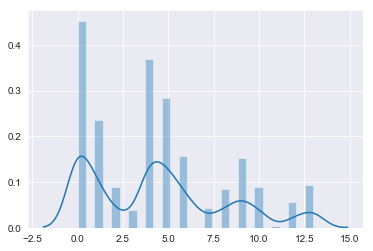

In [813]:
# Null values row wise
sns.distplot(df.isnull().sum(axis=1))

In [814]:
# Since these rows will only worsen our model
df = df[(df['Converted']==1)|(df.isnull().sum(axis=1) <= 8)]

In [815]:
100-df.shape[0]/9240*100

15.779220779220779

Since we have a large dataset we have dropped 15.8% of rows with high null values. But we did not drop any rows that has Converted = 1. Since Conversion is already low and we cant afford to lose information

In [816]:
round(df.isnull().sum()*100/df.shape[0],2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.45
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.63
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.63
Last Activity                                     1.30
Country                                          21.55
Specialization                                    5.83
How did you hear about X Education               11.80
What is your current occupation                  16.06
What matters most to you in choosing a course    16.11
Search                                            0.00
Magazine                                          0.00
Newspaper 

### Prospect ID and Lead Number

In [817]:
# Prospect ID
print(df['Prospect ID'].nunique())
len(df['Prospect ID'].drop_duplicates())

7782


7782

In [818]:
# Lead Number
print(df['Lead Number'].nunique())
len(df['Lead Number'].drop_duplicates())

7782


7782

In [819]:
# Since both lead Number and Prospect ID identify a row uniquely. We need only one of them.
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [820]:
# Dropping Prospect ID & Lead number
df.drop(columns = ['Prospect ID','Lead Number'], axis=1, inplace = True)

### Lead Origin

In [821]:
df['Lead Origin'].value_counts()

Landing Page Submission    4399
API                        2618
Lead Add Form               715
Lead Import                  49
Quick Add Form                1
Name: Lead Origin, dtype: int64

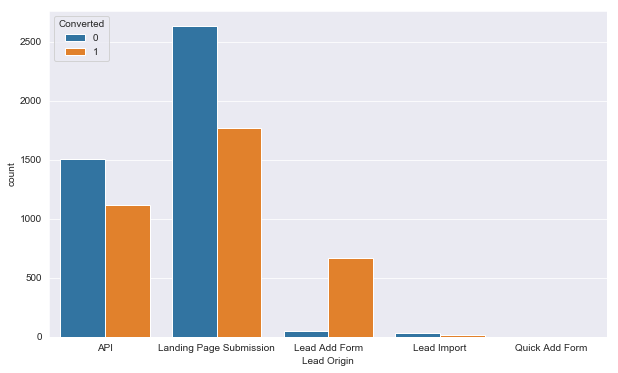

In [822]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['Lead Origin'], hue=df['Converted'])

In [823]:
df = pd.concat([df.drop('Lead Origin', axis = 1), pd.get_dummies(df['Lead Origin'])], axis=1).drop('Quick Add Form', axis=1)

In [824]:
df.columns

Index(['Lead Source', 'Do Not Email', 'Do Not Call', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import'],
      dtype=

Since there are 30 objects type columns we will need to do this dummification repeatedly for many columns.<br>It is better to create a function for it. It will get dummies and concat to original dataframe and remove the dummified columns in one go.

In [825]:
# Creating function of what we just did for Lead Origin
def dummify(data, dummify, remove):
    data = pd.concat([data.drop(dummify, axis = 1), pd.get_dummies(data[dummify])], axis=1).drop(remove, axis=1)
    return data

### Lead Source

In [826]:
df['Lead Source'].value_counts()

Google               2586
Direct Traffic       2254
Organic Search       1060
Olark Chat            979
Reference             532
Welingak Website      142
Referral Sites        122
Facebook               49
google                  5
Click2call              4
bing                    3
Press_Release           2
Social Media            2
Live Chat               2
testone                 1
Pay per Click Ads       1
NC_EDM                  1
WeLearn                 1
blog                    1
Name: Lead Source, dtype: int64

There is just 0.45% of missing values in Lead Source column. We can simply impute this with mode because this is a categorical column.

In [827]:
df.fillna({'Lead Source': df['Lead Source'].mode()[0]}, inplace=True)
df.loc[df['Lead Source']=='google','Lead Source'] = 'Google'

In [828]:
df['Lead Source'].isnull().sum()

0

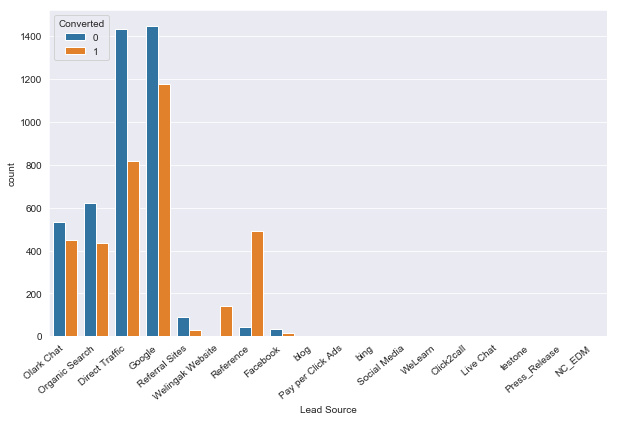

In [829]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=df['Lead Source'], hue=df['Converted'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

Creating dummies for this feature will add a lot of columns but if we see values after Facebook - blogs, pay per click ads, bing etc, they have very few instances. So lets dummify this feature keep only till facebook.

In [830]:
# We can group everything beyond Facebook as 'other_leads' and drop it while dummifying.
df = dummify(data=df, dummify='Lead Source', remove=['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call',
                                                     'Live Chat','testone','Press_Release','NC_EDM'])

In [831]:
df.columns

Index(['Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Direct Traffic', 'Fa

### Do Not Call and Do Not Email

In [832]:
df['Do Not Call'].value_counts()

No     7780
Yes       2
Name: Do Not Call, dtype: int64

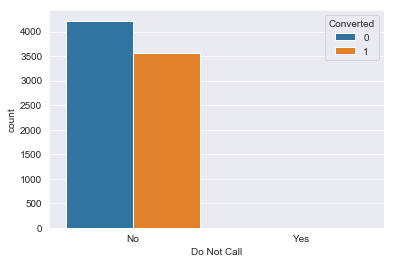

In [833]:
sns.countplot(x=df['Do Not Call'], hue=df['Converted'])

In [834]:
df.drop('Do Not Call', axis=1, inplace=True)

In [835]:
df['Do Not Email'].value_counts()

No     7226
Yes     556
Name: Do Not Email, dtype: int64

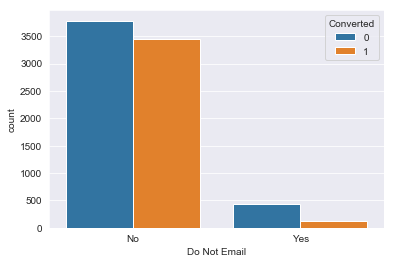

In [836]:
sns.countplot(x=df['Do Not Email'], hue=df['Converted'])

In [837]:
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

There may be more than one feature that needs such mapping. Lets check them all.

In [838]:
pd.set_option('display.max_columns', 500)

In [839]:
df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,API,Landing Page Submission,Lead Add Form,Lead Import,Direct Traffic,Facebook,Google,Olark Chat,Organic Search,Reference,Referral Sites,Welingak Website
0,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,1,0,0,0,0,0,0,1,0,0,0,0
1,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,1,0,0,0,0,0,0,0,1,0,0,0
2,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,0,1,0,0,1,0,0,0,0,0,0,0
3,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,0,1,0,0,1,0,0,0,0,0,0,0
4,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,0,1,0,0,0,0,1,0,0,0,0,0


In [840]:
varlist =  ['Do Not Email','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement'
           ,'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
            'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

In [841]:
df[varlist] = df[varlist].apply(binary_map)

In [842]:
df[varlist].sum()

Do Not Email                                 556
Search                                        13
Magazine                                       0
Newspaper Article                              1
X Education Forums                             0
Newspaper                                      1
Digital Advertisement                          3
Through Recommendations                        6
Receive More Updates About Our Courses         0
Update me on Supply Chain Content              0
Get updates on DM Content                      0
I agree to pay the amount through cheque       0
A free copy of Mastering The Interview      2625
dtype: int64

This tells us that among these columns there is hardly any variation in any feature except 'Do Not Email' and 'A free copy of Mastering The Interview'

In [843]:
# Dropping all other features.
varlist.remove('A free copy of Mastering The Interview')
varlist.remove('Do Not Email')

In [844]:
df.drop(varlist, axis=1, inplace=True)

In [845]:
df.shape

(7782, 33)

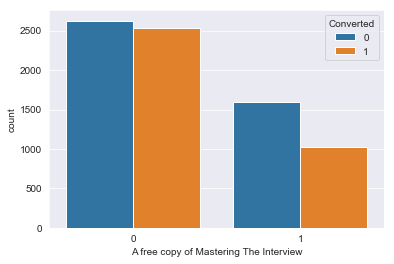

In [846]:
sns.countplot(x=df['A free copy of Mastering The Interview'], hue=df['Converted'])

### Total Visits

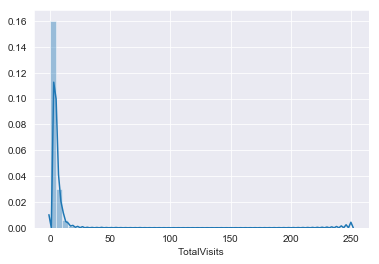

In [847]:
# Numerical variable hence a distributuion plot
sns.distplot(df['TotalVisits'].dropna())

Highly skewed distribution. We can use median to impute but we can also use WOE here.

In [848]:
df.fillna({'TotalVisits': -1}, inplace=True)

In [849]:
df['TotalVisits'].isnull().sum()

0

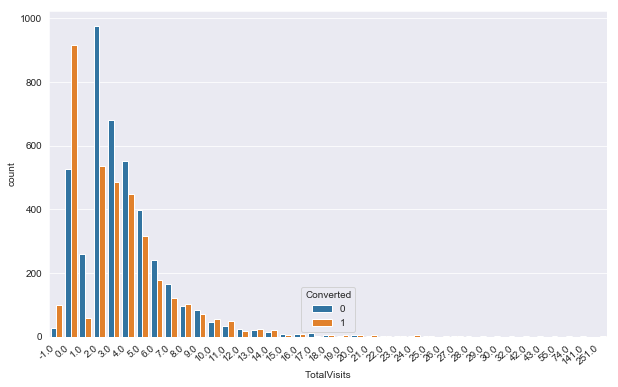

In [850]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=df['TotalVisits'], hue=df['Converted'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [851]:
df['TotalVisits'].value_counts()

 2.0      1513
 0.0      1443
 3.0      1167
 4.0      1001
 5.0       715
 6.0       420
 1.0       320
 7.0       288
 8.0       199
 9.0       157
-1.0       127
 10.0      104
 11.0       82
 13.0       45
 12.0       43
 14.0       35
 16.0       18
 15.0       16
 17.0       15
 18.0       13
 20.0       11
 19.0        7
 21.0        6
 23.0        6
 24.0        5
 27.0        5
 25.0        4
 22.0        3
 29.0        2
 28.0        2
 26.0        2
 74.0        1
 55.0        1
 141.0       1
 42.0        1
 251.0       1
 32.0        1
 30.0        1
 43.0        1
Name: TotalVisits, dtype: int64

### WOE on TotalVisits feature

In [852]:
df['TotalVisits_range'] = pd.cut(df['TotalVisits'],
                                 [-1, -0.5, 0.5, 1.5, 2.5, 7.5, 27.5, 252],
                                 include_lowest=False, right=False,
                                 labels=['Nulls','NoVisits','oneVisit','TwoVisits','ModerateVisits','HighVisits','VeryHighVisits'])

In [853]:
df['TotalVisits_range'].value_counts()

ModerateVisits    3591
TwoVisits         1513
NoVisits          1443
HighVisits         776
oneVisit           320
Nulls              127
VeryHighVisits      12
Name: TotalVisits_range, dtype: int64

In [854]:
woe_totalvisits = pd.DataFrame(
    {'Converted' :df.groupby(by='TotalVisits_range').sum()['Converted'],
    'Total' : df.groupby(by='TotalVisits_range').count()['Converted']})
woe_totalvisits

,Converted,Total
TotalVisits_range,,
Nulls,100,127
NoVisits,916,1443
oneVisit,60,320
TwoVisits,537,1513
ModerateVisits,1550,3591
HighVisits,397,776
VeryHighVisits,1,12


In [855]:
woe_totalvisits['Not Converted'] = woe_totalvisits['Total'] - woe_totalvisits['Converted']
woe_totalvisits

,Converted,Total,Not Converted
TotalVisits_range,,,
Nulls,100,127,27
NoVisits,916,1443,527
oneVisit,60,320,260
TwoVisits,537,1513,976
ModerateVisits,1550,3591,2041
HighVisits,397,776,379
VeryHighVisits,1,12,11


In [856]:
import math
total_good = woe_totalvisits['Converted'].sum()
total_bad = woe_totalvisits['Not Converted'].sum()
a = woe_totalvisits['Converted'].apply(lambda x: math.log(x/total_good))
b = woe_totalvisits['Not Converted'].apply(lambda x: math.log(x/total_bad))
woe_totalvisits['WOE'] = a - b

In [857]:
woe_totalvisits

,Converted,Total,Not Converted,WOE
TotalVisits_range,,,,
Nulls,100,127,27,1.479364
NoVisits,916,1443,527,0.722846
oneVisit,60,320,260,-1.296306
TwoVisits,537,1513,976,-0.427434
ModerateVisits,1550,3591,2041,-0.105154
HighVisits,397,776,379,0.216431
VeryHighVisits,1,12,11,-2.227865


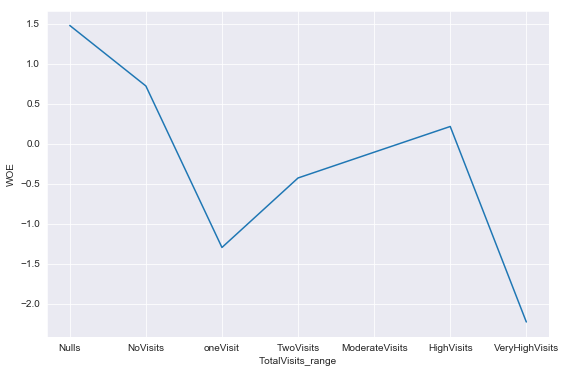

In [858]:
sns.set_style('darkgrid')
plt.figure(figsize=(9, 6))
sns.lineplot(x=woe_totalvisits.index, y=woe_totalvisits['WOE'])

WOE is mostly used to in credit cards scoring to get a monotonic relationship with the variable. Here It is very clear that if do some coarse binning then we will get a monotonic curve but that would loose a lot of information and it will certainly not benefit our model. Instead I will use label encoding here.

### Encoding TotalVisit
Since WOE does not work for us. I will wncode this feature using conversion percentage but only after train_test_split

### Page Views Per Visit

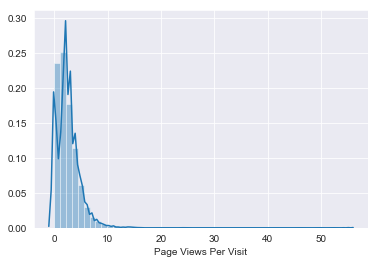

In [859]:
sns.distplot(df['Page Views Per Visit'].dropna())

Using Median again to impute the missing values.

In [860]:
df.fillna({'Page Views Per Visit': df['Page Views Per Visit'].median()}, inplace=True)

In [861]:
df['Page Views Per Visit'].isnull().sum()

0

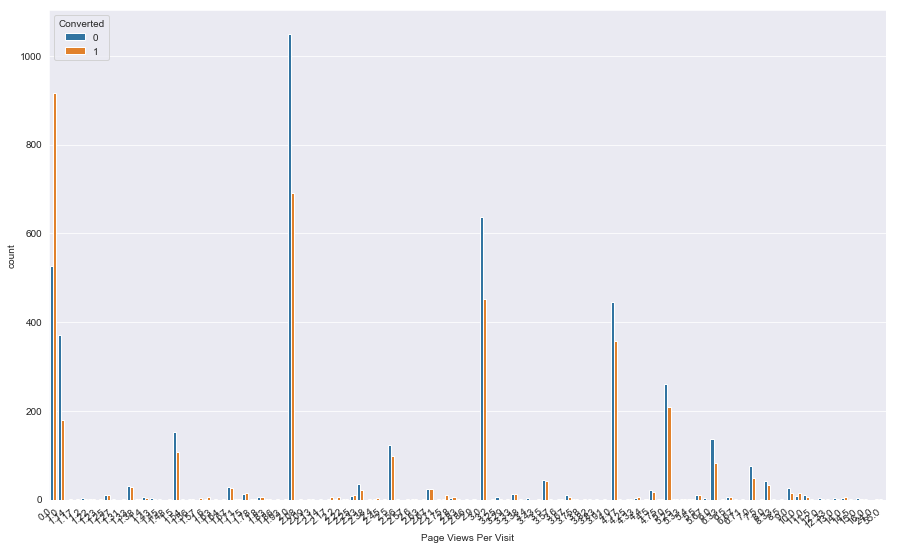

In [862]:
plt.figure(figsize=(15,9))
ax = sns.countplot(x=df['Page Views Per Visit'], hue=df['Converted'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [863]:
# Conversion percentage based on Page views per visit
perc = df.groupby(by='Page Views Per Visit')['Converted'].sum()*100/df.groupby(by='Page Views Per Visit')['Converted'].count()

In [864]:
temp = pd.DataFrame({'Percentage' : perc})
temp.reset_index(level=0, inplace=True)
temp.head()

,Page Views Per Visit,Percentage
0,0.00,63.478863
1,1.00,32.545455
2,1.14,100.000000
3,1.17,100.000000
4,1.20,20.000000


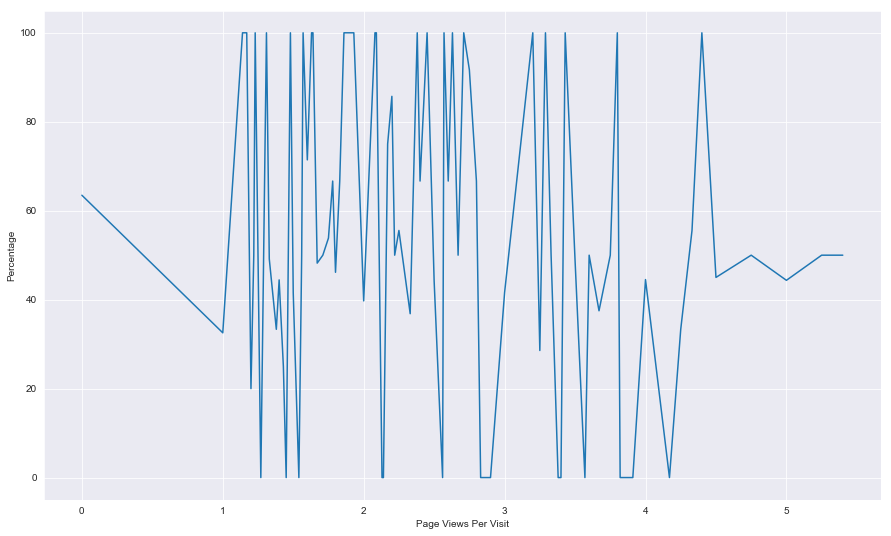

In [865]:
# To better visulaize I have avoided plotting outliers here.
# Conversion percentage vs Page Views Per Visit
plt.figure(figsize=(15,9))
sns.lineplot(y=temp.Percentage[:84], x=temp['Page Views Per Visit'][:84])

Since we cannot get any useful trend from this we are dropping this feature.

In [866]:
df.drop('Page Views Per Visit', axis=1, inplace =True)
df.columns

Index(['Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Last Activity', 'Country',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity', 'API', 'Landing Page Submission',
       'Lead Add Form', 'Lead Import', 'Direct Traffic', 'Facebook', 'Google',
       'Olark Chat', 'Organic Search', 'Reference', 'Referral Sites',
       'Welingak Website', 'TotalVisits_range'],
      dtype='object')

### Country

In [867]:
df['Country'].value_counts()

India                   5848
United States             61
United Arab Emirates      49
Singapore                 24
Saudi Arabia              18
United Kingdom            13
Australia                 11
Qatar                      9
Bahrain                    6
France                     6
Oman                       6
Hong Kong                  6
Kuwait                     4
South Africa               4
Nigeria                    4
Sweden                     3
Canada                     3
unknown                    3
Uganda                     2
Ghana                      2
Asia/Pacific Region        2
Netherlands                2
Philippines                2
Bangladesh                 2
China                      2
Germany                    2
Russia                     1
Kenya                      1
Tanzania                   1
Malaysia                   1
Indonesia                  1
Sri Lanka                  1
Italy                      1
Vietnam                    1
Belgium       

Although imputing with mode seems good but the percentage of missing is 21.5% here. We will not benefit from this column as the variance here is too low. Also it has high null values. Dropping the feature.

In [868]:
df.drop('Country', axis=1, inplace = True)

### Specialization

In [869]:
df['Specialization'].value_counts(dropna = False)

Select                               1934
Finance Management                    896
Human Resource Management             784
Marketing Management                  776
Operations Management                 464
NaN                                   454
Business Administration               377
IT Projects Management                331
Supply Chain Management               328
Banking, Investment And Insurance     321
Media and Advertising                 185
Travel and Tourism                    176
International Business                161
Healthcare Management                 141
Hospitality Management                106
E-COMMERCE                            103
Retail Management                      90
Rural and Agribusiness                 67
E-Business                             53
Services Excellence                    35
Name: Specialization, dtype: int64

In [870]:
(1934+454)/len(df)*100

30.686198920585966

Very high - 31% of Null values are present here.

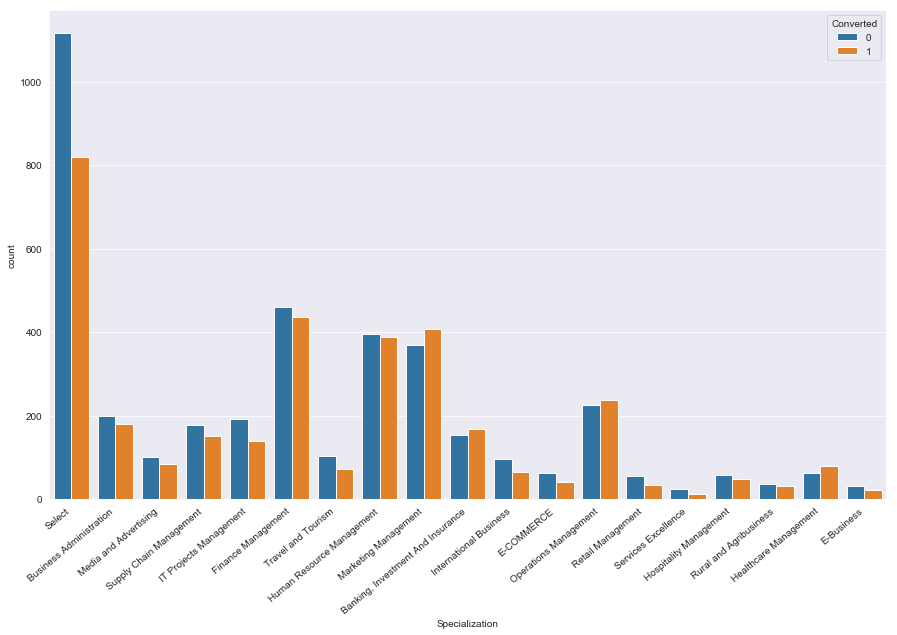

In [871]:
# Specialization
plt.figure(figsize=(15,9))
ax = sns.countplot(x=df['Specialization'], hue=df['Converted'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

Except for Select, all other bars are pretty much similar. So lack of variation and High null values. Dropping this feature too.

In [872]:
df.drop('Specialization', axis=1, inplace=True)

### How did you hear about X Education

In [873]:
df['How did you hear about X Education'].value_counts(dropna = False)

Select                   5040
NaN                       918
Online Search             737
Word Of Mouth             319
Student of SomeSchool     292
Other                     174
Multiple Sources          138
Advertisements             61
Social Media               61
Email                      24
SMS                        18
Name: How did you hear about X Education, dtype: int64

In [874]:
# Select + NaN = Nulls
(5040+918)/len(df)*100

76.56129529683886

In [875]:
# Need to drop this feature for sure
df.drop('How did you hear about X Education', axis=1, inplace=True)

### What matters most to you in choosing a course

In [876]:
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6525
NaN                          1254
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [877]:
# No variation present. Droppping the feature
df.drop('What matters most to you in choosing a course', axis=1, inplace=True)

### Lead Quality

In [878]:
df['Lead Quality'].value_counts(dropna=False)

NaN                  3309
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

Here Also it is very high null values. These Simply mean we dont know about the lead quality. I am imputing unknown here.

In [879]:
# Null Percentage
3309/len(df)*100

42.521202775636084

In [880]:
df.drop('Lead Quality', axis=1,  inplace = True)

### Lead Profile

In [881]:
df['Lead Profile'].value_counts(dropna=False)

Select                         4143
Potential Lead                 1613
NaN                            1254
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [882]:
# Null Percentage
(4143 + 1254)/len(df)*100

69.35235158057054

In [883]:
df.drop('Lead Profile', axis=1,  inplace = True)

### City

In [884]:
df['City'].value_counts(dropna=False)

Mumbai                         2953
Select                         2246
Thane & Outskirts               691
Other Cities                    621
NaN                             454
Other Cities of Maharashtra     407
Other Metro Cities              347
Tier II Cities                   63
Name: City, dtype: int64

In [885]:
# Null Percentage
(2246 + 454)/len(df)*100

34.69545104086353

In [886]:
df.drop('City', axis=1,  inplace = True)

### Asymmetrique Activity Index(AAI) & Asymmetrique Activity Score(AAS)

In [887]:
df['Asymmetrique Activity Index'].value_counts(dropna=False)

02.Medium    3752
NaN          3162
01.High       515
03.Low        353
Name: Asymmetrique Activity Index, dtype: int64

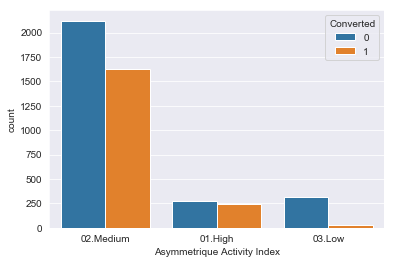

In [888]:
sns.countplot(x=df['Asymmetrique Activity Index'], hue=df['Converted'])

It is quite clear from the above plot that when Asymmetrique Activity Index(AAI) is <br>High - conversion is close to 50%<br>Medium - Still above average of 38% <br>Low - Very low<br> This suggests that AAI is very crucial feature.<br> Lets Examine Asymmetrique Activity Score(AAS) here too.

In [889]:
df['Asymmetrique Activity Score'].value_counts(dropna=False)

NaN      3162
 14.0    1729
 15.0    1250
 13.0     773
 16.0     408
 12.0     189
 17.0     102
 11.0      93
 10.0      57
 9.0        9
 18.0       5
 8.0        4
 7.0        1
Name: Asymmetrique Activity Score, dtype: int64

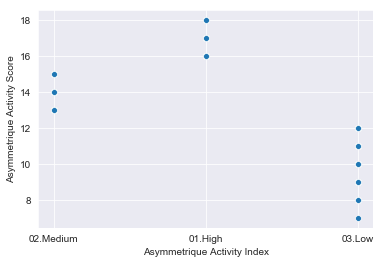

In [890]:
sns.scatterplot(data=df,x='Asymmetrique Activity Index',y='Asymmetrique Activity Score')

As suspected, AAI is based on AAS.<br> AAS < 13 = Low<br>13 < AAS < 15 = Medium<br>AAS > 15 = High.<br>AAI - logistic regression model - More robust that way<br>AAS - PCA - as categorical is not good for PCA

AAS is probably dependent on other features like  TotalVisits, Total Time Spent on Website, Page Views Per Visit.

I would use 55% data of AAS to predict rest 45% missing AAS and impute it. This will also give us the AAI. And in turn we will be able to drop these 3 features altogether.

### Asymmetrique Profile Index & Asymmetrique Profile Score

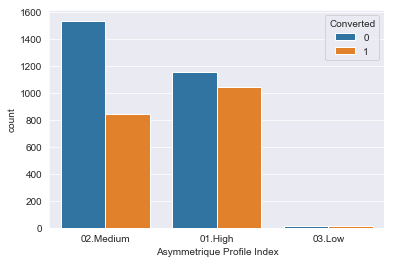

In [891]:
sns.countplot(x=df['Asymmetrique Profile Index'], hue=df['Converted'])

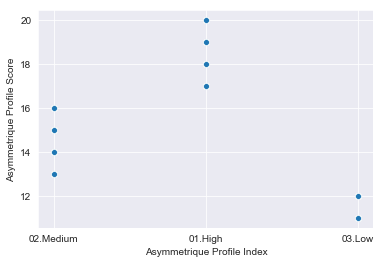

In [892]:
sns.scatterplot(data=df,x='Asymmetrique Profile Index',y='Asymmetrique Profile Score')

Although the Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score are really good features but 45% of rows have nulls.

We can either build a model with only 55% of rows with these features or we can use all rows without these features.
<br>We can use segmentation here. Build on model with there features and other without these features.<br>For now I am dropping them

In [893]:
df.drop(columns = ['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], axis=1,  inplace = True)

In [894]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7782 entries, 0 to 9239
Data columns (total 22 columns):
Do Not Email                              7782 non-null int64
Converted                                 7782 non-null int64
TotalVisits                               7782 non-null float64
Total Time Spent on Website               7782 non-null int64
Last Activity                             7681 non-null object
What is your current occupation           6532 non-null object
Tags                                      5881 non-null object
A free copy of Mastering The Interview    7782 non-null int64
Last Notable Activity                     7782 non-null object
API                                       7782 non-null uint8
Landing Page Submission                   7782 non-null uint8
Lead Add Form                             7782 non-null uint8
Lead Import                               7782 non-null uint8
Direct Traffic                            7782 non-null uint8
Facebook           

## Train Test Split

In [895]:
from sklearn.model_selection import train_test_split

In [896]:
df_train, df_test = train_test_split(df, test_size=0.33, random_state=42)

In [897]:
len(df_train)

5213

In [898]:
len(df_test)

2569

### Lets complete our remaining Encodings
Doing conversion percentage encoding but to avoid data leakage, doing it after train_test split.

### Total Visits

In [899]:
lbl_totalvisits = pd.DataFrame(
    {'Converted' : df_train.groupby(by='TotalVisits').sum()['Converted'],
    'Total' : df_train.groupby(by='TotalVisits').count()['Converted']})
lbl_totalvisits.head()

,Converted,Total
TotalVisits,,
-1.0,63,78
0.0,627,991
1.0,39,213
2.0,357,1012
3.0,318,788


In [900]:
lbl_totalvisits['Percentage'] = lbl_totalvisits['Converted']*100/lbl_totalvisits['Total']
lbl_totalvisits.reset_index(level=0, inplace = True)
lbl_totalvisits.head()

,TotalVisits,Converted,Total,Percentage
0,-1.0,63,78,80.769231
1,0.0,627,991,63.269425
2,1.0,39,213,18.309859
3,2.0,357,1012,35.276680
4,3.0,318,788,40.355330


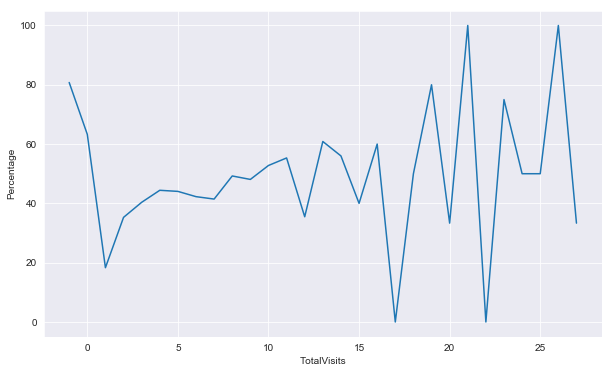

In [901]:
sns.set_style()
plt.figure(figsize=(10,6))
sns.lineplot(x=lbl_totalvisits.TotalVisits[0:29], y=lbl_totalvisits.Percentage[0:29])

In [902]:
df_train['TotalVisits_range'] = pd.cut(df_train['TotalVisits'],
                                 [-1, -0.5, 0.5, 1.5, 4.5, 7.5, 10.5, 15.5, 28.5, 252],
                                 include_lowest=False, right=False,
                          labels=['Nulls','NoVisits','oneVisit','ThreeVisits','FiveVisits','EightVisits','TwelveVisits','TwentyVisits','VeryHighVisits'])
df_test['TotalVisits_range'] = pd.cut(df_test['TotalVisits'],
                                 [-1, -0.5, 0.5, 1.5, 4.5, 7.5, 10.5, 15.5, 28.5, 252],
                                 include_lowest=False, right=False,
                          labels=['Nulls','NoVisits','oneVisit','ThreeVisits','FiveVisits','EightVisits','TwelveVisits','TwentyVisits','VeryHighVisits'])

In [903]:
visit_map = dict(df_train.groupby(by='TotalVisits_range')['Converted'].sum()/df_train.groupby(by='TotalVisits_range')['Converted'].count())
visit_map

{'Nulls': 0.8076923076923077,
 'NoVisits': 0.6326942482341069,
 'oneVisit': 0.18309859154929578,
 'ThreeVisits': 0.3937677053824363,
 'FiveVisits': 0.429769392033543,
 'EightVisits': 0.4967532467532468,
 'TwelveVisits': 0.5073529411764706,
 'TwentyVisits': 0.48214285714285715,
 'VeryHighVisits': 0.0}

In [904]:
df_train[['TotalVisits_range']] = df_train[['TotalVisits_range']].apply(lambda x: x.map(visit_map))
df_test[['TotalVisits_range']] = df_test[['TotalVisits_range']].apply(lambda x: x.map(visit_map))

In [905]:
df_train.drop('TotalVisits', axis=1, inplace = True)
df_train.rename({'TotalVisits_range':'TotalVisits'},axis=1, inplace=True)

In [906]:
df_test.drop('TotalVisits', axis=1, inplace = True)
df_test.rename({'TotalVisits_range':'TotalVisits'},axis=1, inplace=True)

### Total Time Spent on Website

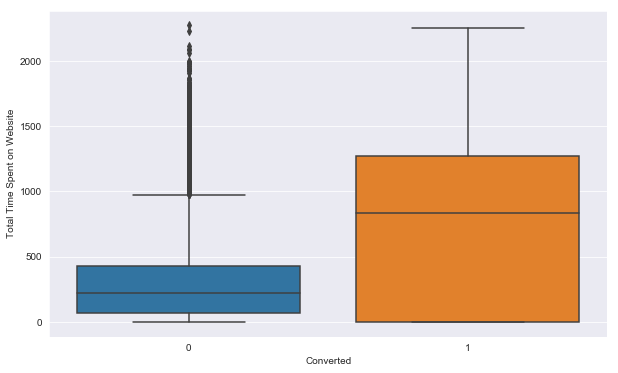

In [907]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Converted'],y=df['Total Time Spent on Website'])

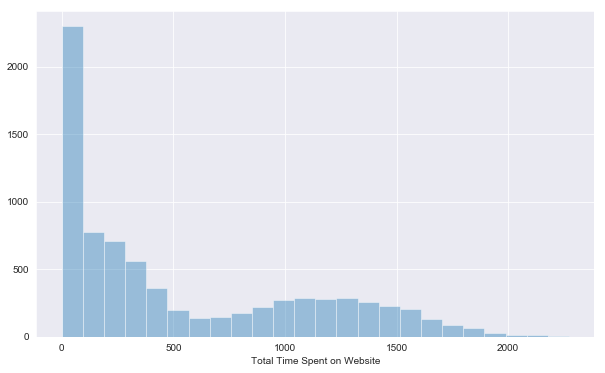

In [908]:
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.distplot(df['Total Time Spent on Website'], kde=False)

Since most of the observations are clumped together from 0 to 100 we will use small buckets. After 100 we will use big bucket size.

In [909]:
# Detailed small buckets
small_bucket_array = np.linspace(-3, 100, 10,endpoint=False)
small_bucket_array

array([-3. ,  7.3, 17.6, 27.9, 38.2, 48.5, 58.8, 69.1, 79.4, 89.7])

In [910]:
# Large Buckets
big_bucket_array = np.linspace(100, 2272, 23)
big_bucket_array

array([ 100.        ,  198.72727273,  297.45454545,  396.18181818,
        494.90909091,  593.63636364,  692.36363636,  791.09090909,
        889.81818182,  988.54545455, 1087.27272727, 1186.        ,
       1284.72727273, 1383.45454545, 1482.18181818, 1580.90909091,
       1679.63636364, 1778.36363636, 1877.09090909, 1975.81818182,
       2074.54545455, 2173.27272727, 2272.        ])

In [911]:
custom_buckets =  list(small_bucket_array) + list(big_bucket_array)

In [912]:
df_train['Timespent_range'] = pd.cut(df_train['Total Time Spent on Website'],bins=custom_buckets,
                               include_lowest=False)

In [913]:
df_test['Timespent_range'] = pd.cut(df_test['Total Time Spent on Website'],bins=custom_buckets,
                               include_lowest=False)

In [914]:
df_train['Timespent_range'].head()

5725      (1186.0, 1284.727]
2022    (1284.727, 1383.455]
6764             (-3.0, 7.3]
7305      (396.182, 494.909]
1743      (198.727, 297.455]
Name: Timespent_range, dtype: category
Categories (32, interval[float64]): [(-3.0, 7.3] < (7.3, 17.6] < (17.6, 27.9] < (27.9, 38.2] ... (1877.091, 1975.818] < (1975.818, 2074.545] < (2074.545, 2173.273] < (2173.273, 2272.0]]

In [915]:
df_test['Timespent_range'].head()

9132      (100.0, 198.727]
2068    (396.182, 494.909]
2442    (396.182, 494.909]
2498    (1186.0, 1284.727]
108     (396.182, 494.909]
Name: Timespent_range, dtype: category
Categories (32, interval[float64]): [(-3.0, 7.3] < (7.3, 17.6] < (17.6, 27.9] < (27.9, 38.2] ... (1877.091, 1975.818] < (1975.818, 2074.545] < (2074.545, 2173.273] < (2173.273, 2272.0]]

In [916]:
timespent_map = pd.DataFrame({'TimeSpent':df_train.groupby(by='Timespent_range')['Converted'].count(),
              'Conversion':df_train.groupby(by='Timespent_range')['Converted'].sum()/df_train.groupby(by='Timespent_range')['Converted'].count() })
timespent_map.head()

,TimeSpent,Conversion
Timespent_range,,
"(-3.0, 7.3]",1028,0.615759
"(7.3, 17.6]",67,0.164179
"(17.6, 27.9]",57,0.140351
"(27.9, 38.2]",75,0.173333
"(38.2, 48.5]",52,0.173077


In [917]:
df_train = pd.merge(left=df_train, right= timespent_map.drop('TimeSpent', axis=1), how='left',on='Timespent_range')

In [918]:
df_test = pd.merge(left=df_test, right= timespent_map.drop('TimeSpent', axis=1), how='left',on='Timespent_range')

In [919]:
df_train.drop(['Total Time Spent on Website','Timespent_range'], axis=1, inplace=True)
df_train.rename({'Conversion':'Total Time Spent on Website'},axis=1, inplace=True)

In [920]:
df_test.drop(['Total Time Spent on Website','Timespent_range'], axis=1, inplace=True)
df_test.rename({'Conversion':'Total Time Spent on Website'},axis=1, inplace=True)

In [921]:
df_train.columns

Index(['Do Not Email', 'Converted', 'Last Activity',
       'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Direct Traffic', 'Facebook', 'Google', 'Olark Chat', 'Organic Search',
       'Reference', 'Referral Sites', 'Welingak Website', 'TotalVisits',
       'Total Time Spent on Website'],
      dtype='object')

In [922]:
df_test.columns

Index(['Do Not Email', 'Converted', 'Last Activity',
       'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Direct Traffic', 'Facebook', 'Google', 'Olark Chat', 'Organic Search',
       'Reference', 'Referral Sites', 'Welingak Website', 'TotalVisits',
       'Total Time Spent on Website'],
      dtype='object')

### Last Activity

In [923]:
# This is a categorical variable
df['Last Activity'].value_counts(dropna=False)

Email Opened                    2962
SMS Sent                        2582
Olark Chat Conversation          520
Page Visited on Website          518
Converted to Lead                361
Email Bounced                    235
Email Link Clicked               206
Form Submitted on Website        105
NaN                              101
Unreachable                       87
Unsubscribed                      55
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       5
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

Using Mode to impute the missing values.

In [924]:
df_train.fillna({'Last Activity': 'Email Opened'}, inplace=True)
df_test.fillna({'Last Activity': 'Email Opened'}, inplace=True)

In [925]:
df_train['Last Activity'].isnull().sum()

0

In [926]:
df_test['Last Activity'].isnull().sum()

0

In [927]:
grouped = df_train.groupby(by='Last Activity')['Converted']
LA_map = dict(grouped.sum()/grouped.count())
LA_map

{'Approached upfront': 1.0,
 'Converted to Lead': 0.13692946058091288,
 'Email Bounced': 0.10596026490066225,
 'Email Link Clicked': 0.34057971014492755,
 'Email Marked Spam': 1.0,
 'Email Opened': 0.4304099142040038,
 'Email Received': 1.0,
 'Form Submitted on Website': 0.22666666666666666,
 'Had a Phone Conversation': 0.7894736842105263,
 'Olark Chat Conversation': 0.1436950146627566,
 'Page Visited on Website': 0.28869047619047616,
 'SMS Sent': 0.6688159437280188,
 'Unreachable': 0.4166666666666667,
 'Unsubscribed': 0.2777777777777778,
 'View in browser link Clicked': 0.0,
 'Visited Booth in Tradeshow': 0.0}

In [928]:
# While doing test_train split this was the only resubscribed to emails
df_test.loc[df_test['Last Activity']=='Resubscribed to emails',['Converted']]

,Converted
1777,1


In [929]:
LA_map = {'Approached upfront': 1.0,
 'Converted to Lead': 0.13692946058091288,
 'Email Bounced': 0.10596026490066225,
 'Email Link Clicked': 0.34057971014492755,
 'Email Marked Spam': 1.0,
 'Email Opened': 0.4304099142040038,
 'Email Received': 1.0,
 'Form Submitted on Website': 0.22666666666666666,
 'Had a Phone Conversation': 0.7894736842105263,
 'Olark Chat Conversation': 0.1436950146627566,
 'Page Visited on Website': 0.28869047619047616,
 'SMS Sent': 0.6688159437280188,
 'Unreachable': 0.4166666666666667,
 'Unsubscribed': 0.2777777777777778,
 'View in browser link Clicked': 0.0,
 'Visited Booth in Tradeshow': 0.0,
 'Resubscribed to emails':1.0}

In [930]:
df_train[['Last Activity']] = df_train[['Last Activity']].apply(lambda x: x.map(LA_map))
df_test[['Last Activity']] = df_test[['Last Activity']].apply(lambda x: x.map(LA_map))

In [931]:
df_train['Last Activity'].head()

0    0.668816
1    0.668816
2    0.143695
3    0.668816
4    0.430410
Name: Last Activity, dtype: float64

In [932]:
df_test['Last Activity'].head()

0    0.288690
1    0.430410
2    0.668816
3    0.430410
4    0.143695
Name: Last Activity, dtype: float64

In [933]:
df_train['Last Activity'].isnull().sum()

0

In [934]:
df_test['Last Activity'].isnull().sum()

0

### What is your current occupation

In [935]:
df['What is your current occupation'].value_counts(dropna= False)

Unemployed              5596
NaN                     1250
Working Professional     704
Student                  198
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [936]:
# Null Percentage
1250/len(df)*100

16.0627088152146

In [937]:
df_train.loc[df_train['What is your current occupation'].isnull(),['What is your current occupation']] = 'Unknown'

In [938]:
df_test.loc[df_test['What is your current occupation'].isnull(),['What is your current occupation']] = 'Unknown'

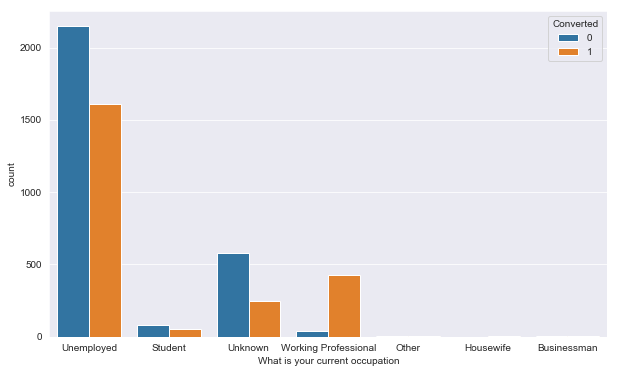

In [939]:
plt.figure(figsize=(10,6))
sns.countplot(x=df_train['What is your current occupation'], hue=df_train['Converted'])

In [940]:
occup_map = dict(df_train.groupby(by='What is your current occupation')['Converted'].sum()/df_train.groupby(by='What is your current occupation')['Converted'].count())
occup_map

{'Businessman': 0.5714285714285714,
 'Housewife': 1.0,
 'Other': 0.6666666666666666,
 'Student': 0.41911764705882354,
 'Unemployed': 0.42887529912257377,
 'Unknown': 0.2991556091676719,
 'Working Professional': 0.9197396963123644}

In [941]:
df_train[['What is your current occupation']] = df_train[['What is your current occupation']].apply(lambda x: x.map(occup_map))
df_test[['What is your current occupation']] = df_test[['What is your current occupation']].apply(lambda x: x.map(occup_map))

In [942]:
df_train['What is your current occupation'].head()

0    0.428875
1    0.428875
2    0.419118
3    0.428875
4    0.299156
Name: What is your current occupation, dtype: float64

In [943]:
df_test['What is your current occupation'].head()

0    0.428875
1    0.299156
2    0.428875
3    0.428875
4    0.299156
Name: What is your current occupation, dtype: float64

In [944]:
df_train['What is your current occupation'].isnull().sum()

0

In [945]:
df_test['What is your current occupation'].isnull().sum()

0

### Tags

In [946]:
df['Tags'].value_counts(dropna=False)

Will revert after reading the email                  2072
NaN                                                  1901
Ringing                                              1202
Interested in other courses                           508
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [947]:
# Null Percentage
1901/len(df)*100

24.42816756617836

In [948]:
df_train.loc[df_train['Tags'].isnull(),['Tags']] = 'unknown'
df_test.loc[df_test['Tags'].isnull(),['Tags']] = 'unknown'

In [949]:
# Nulls in train and test after imputation
df_train['Tags'].isnull().sum(),df_test['Tags'].isnull().sum()

(0, 0)

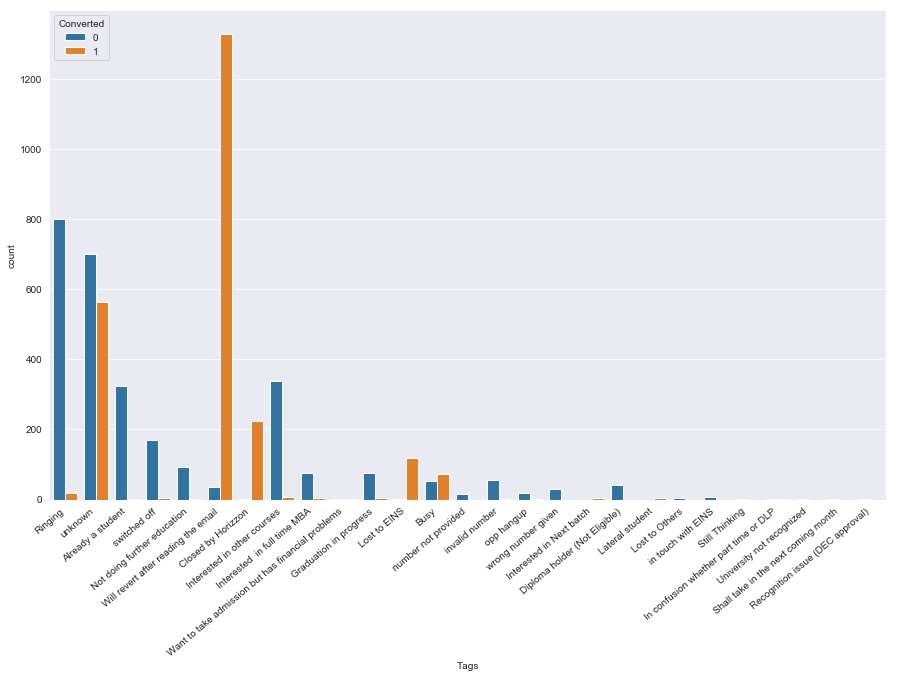

In [950]:
# Tags Counts with Conversion
plt.figure(figsize=(15,9))
ax = sns.countplot(x=df_train['Tags'], hue=df_train['Converted'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

Despite its high null values there are some good information in this feature. Lets keep it and encode it.

In [951]:
grouped = df_train.groupby(by='Tags')['Converted']
tag_map = dict(grouped.sum()/grouped.count())
tag_map

{'Already a student': 0.0030864197530864196,
 'Busy': 0.5748031496062992,
 'Closed by Horizzon': 0.995575221238938,
 'Diploma holder (Not Eligible)': 0.0,
 'Graduation in progress': 0.05063291139240506,
 'In confusion whether part time or DLP': 0.3333333333333333,
 'Interested  in full time MBA': 0.0375,
 'Interested in Next batch': 1.0,
 'Interested in other courses': 0.02023121387283237,
 'Lateral student': 1.0,
 'Lost to EINS': 0.9915966386554622,
 'Lost to Others': 0.0,
 'Not doing further education': 0.010526315789473684,
 'Recognition issue (DEC approval)': 0.0,
 'Ringing': 0.024390243902439025,
 'Shall take in the next coming month': 0.0,
 'Still Thinking': 0.0,
 'University not recognized': 0.0,
 'Want to take admission but has financial problems': 0.5,
 'Will revert after reading the email': 0.9729334308705194,
 'in touch with EINS': 0.0,
 'invalid number': 0.017241379310344827,
 'number not provided': 0.0,
 'opp hangup': 0.05263157894736842,
 'switched off': 0.017341040462427

In [952]:
df_train[['Tags']] = df_train[['Tags']].apply(lambda x: x.map(tag_map))
df_test[['Tags']] = df_test[['Tags']].apply(lambda x: x.map(tag_map))

In [953]:
df_train['Tags'].head()

0    0.024390
1    0.446203
2    0.003086
3    0.017341
4    0.446203
Name: Tags, dtype: float64

In [954]:
 df_test['Tags'].head()

0    0.024390
1    0.446203
2    0.024390
3    0.972933
4    0.446203
Name: Tags, dtype: float64

In [955]:
df_train['Tags'].isnull().sum()

0

In [956]:
df_test['Tags'].isnull().sum()

0

### Last Notable Activity

In [957]:
# This is a categorical variable
df['Last Notable Activity'].value_counts(dropna=False)

Modified                        2612
Email Opened                    2453
SMS Sent                        2097
Page Visited on Website          254
Email Link Clicked               130
Olark Chat Conversation           91
Email Bounced                     56
Unsubscribed                      43
Unreachable                       26
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Email Received                     1
View in browser link Clicked       1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

No missing Values

In [958]:
# While doing test_train split this was the only resubscribed to emails
df_test.loc[df_test['Last Notable Activity']=='Email Received',['Converted']]

,Converted
2275,1


In [959]:
grouped = df_train.groupby(by='Last Notable Activity')['Converted']
LNA_map = dict(grouped.sum()/grouped.count())
LNA_map

{'Approached upfront': 1.0,
 'Email Bounced': 0.10810810810810811,
 'Email Link Clicked': 0.3375,
 'Email Marked Spam': 1.0,
 'Email Opened': 0.4218289085545723,
 'Had a Phone Conversation': 1.0,
 'Modified': 0.2932330827067669,
 'Olark Chat Conversation': 0.22807017543859648,
 'Page Visited on Website': 0.34705882352941175,
 'SMS Sent': 0.7195385724585436,
 'Unreachable': 0.9473684210526315,
 'Unsubscribed': 0.3076923076923077,
 'View in browser link Clicked': 0.0}

In [960]:
LNA_map = {'Approached upfront': 1.0,
 'Email Bounced': 0.10810810810810811,
 'Email Link Clicked': 0.3375,
 'Email Marked Spam': 1.0,
 'Email Opened': 0.4218289085545723,
 'Had a Phone Conversation': 1.0,
 'Modified': 0.2932330827067669,
 'Olark Chat Conversation': 0.22807017543859648,
 'Page Visited on Website': 0.34705882352941175,
 'SMS Sent': 0.7195385724585436,
 'Unreachable': 0.9473684210526315,
 'Unsubscribed': 0.3076923076923077,
 'View in browser link Clicked': 0.0,
 'Email Received': 1.0,
 'Resubscribed to emails':1.0}

In [961]:
df_train[['Last Notable Activity']] = df_train[['Last Notable Activity']].apply(lambda x: x.map(LNA_map))
df_test[['Last Notable Activity']] = df_test[['Last Notable Activity']].apply(lambda x: x.map(LNA_map))

In [962]:
df_train['Last Notable Activity'].head()

0    0.719539
1    0.719539
2    0.293233
3    0.719539
4    0.421829
Name: Last Notable Activity, dtype: float64

In [963]:
df_test['Last Notable Activity'].head()

0    0.347059
1    0.421829
2    0.293233
3    0.421829
4    0.228070
Name: Last Notable Activity, dtype: float64

In [964]:
df_train['Last Notable Activity'].isnull().sum()

0

In [965]:
df_test['Last Notable Activity'].isnull().sum()

0

In [966]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5213 entries, 0 to 5212
Data columns (total 21 columns):
Do Not Email                              5213 non-null int64
Converted                                 5213 non-null int64
Last Activity                             5213 non-null float64
What is your current occupation           5213 non-null float64
Tags                                      5213 non-null float64
A free copy of Mastering The Interview    5213 non-null int64
Last Notable Activity                     5213 non-null float64
API                                       5213 non-null uint8
Landing Page Submission                   5213 non-null uint8
Lead Add Form                             5213 non-null uint8
Lead Import                               5213 non-null uint8
Direct Traffic                            5213 non-null uint8
Facebook                                  5213 non-null uint8
Google                                    5213 non-null uint8
Olark Chat       

In [967]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2569 entries, 0 to 2568
Data columns (total 21 columns):
Do Not Email                              2569 non-null int64
Converted                                 2569 non-null int64
Last Activity                             2569 non-null float64
What is your current occupation           2569 non-null float64
Tags                                      2569 non-null float64
A free copy of Mastering The Interview    2569 non-null int64
Last Notable Activity                     2569 non-null float64
API                                       2569 non-null uint8
Landing Page Submission                   2569 non-null uint8
Lead Add Form                             2569 non-null uint8
Lead Import                               2569 non-null uint8
Direct Traffic                            2569 non-null uint8
Facebook                                  2569 non-null uint8
Google                                    2569 non-null uint8
Olark Chat       

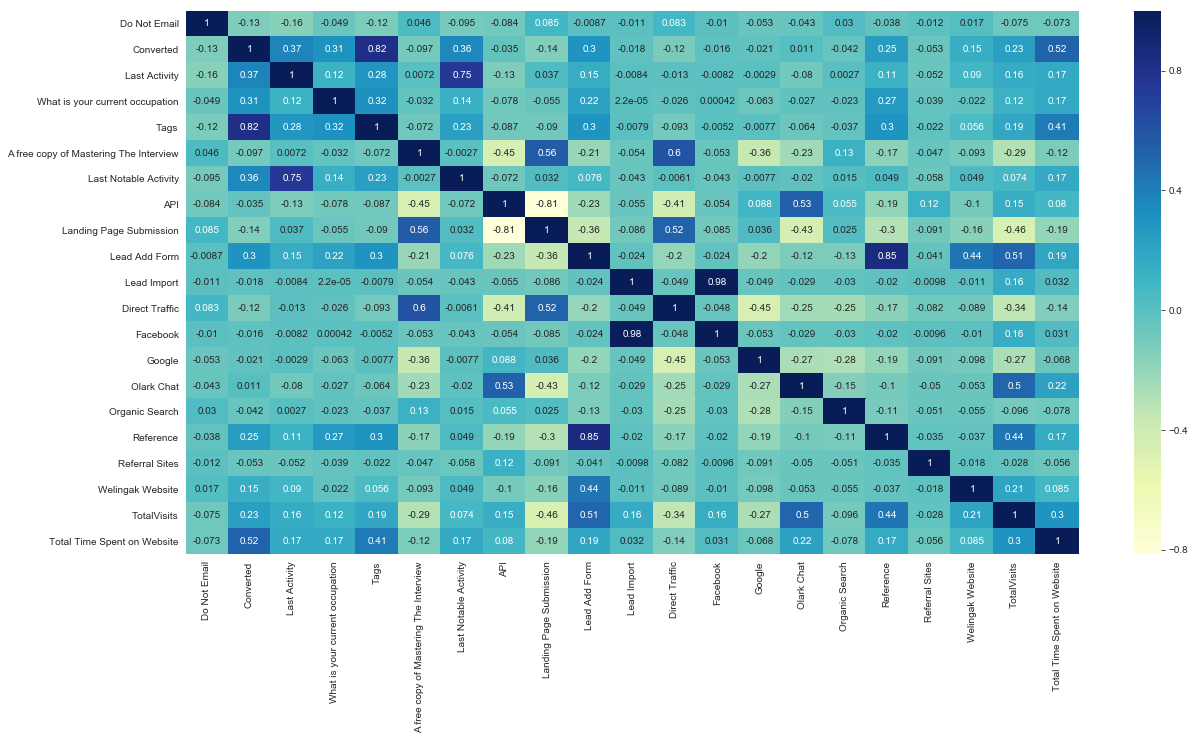

In [968]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df_train.corr(), cmap="YlGnBu", annot=True)

Some Features do have high Correlations but most of it is okay.
We will filter out correlated features using VIFs later.

In [969]:
y_train, X_train = df_train.pop('Converted'), df_train

In [970]:
y_test, X_test = df_test.pop('Converted'), df_test

In [971]:
import statsmodels.api as sm

### First Logistic Model

In [972]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5213
Model:                            GLM   Df Residuals:                     5192
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -837.95
Date:                Sun, 10 Mar 2019   Deviance:                       1675.9
Time:                        22:27:35   Pearson chi2:                 8.19e+03
No. Iterations:                    19   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     11.9125   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Do Not Email                              -0.6191      0.325     -1.903      0.057      -1.257       0.018
Last Activity                              1.8924      0.541      3.495      0.000       0.831       2.954
What is your current occupation            2.9701      0.675      4.398      0.000       1.647       4.294
Tags                                       8.5049      0.288     29.480      0.000       7.940       9.070
A free copy of Mastering The Interview    -0.0438      0.196     -0.223      0.823      -0.429       0.341
Last Notable Activity                      4.9467      0.553      8.944      0.000       3.863       6.031
API                                      -22.2041   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Landing Page Submission                  -22.8714   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Add Form                            -20.6546   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Lead Import                              -39.7015   2.51e+04     -0.002      0.999   -4.92e+04    4.91e+04
Direct Traffic                            -0.0336      1.273     -0.026      0.979      -2.529       2.462
Facebook                                  14.9046   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Google                                    -0.0390      1.269     -0.031      0.975      -2.526       2.448
Olark Chat                                -0.1359      1.302     -0.104      0.917      -2.688       2.416
Organic Search                            -0.2037      1.279     -0.159      0.873      -2.711       2.304
Reference                                 -3.1891      1.776     -1.795      0.073      -6.671       0.293
Referral Sites                            -0.6681      1.370     -0.488      0.626      -3.352       2.016
Welingak Website                           0.8729      1.894      0.461      0.645      -2.838       4.584
TotalVisits                                0.2901      1.061      0.273      0.784      -1.789       2.369
Total Time Spent on Website                4.7153      0.283     16.671      0.000       4.161       5.270
==========================================================================================================
"""

Since I have used Target Encoding and very less one Hot Encoding. I dont have that many features due to less dummification.
<br>So I will not be using RFE here. I will do it manually.

In [973]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def show_vifs(x):
    vif = pd.DataFrame()
    X = x
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    return vif

In [974]:
show_vifs(X_train)

,Features,VIF
7,Landing Page Submission,210.43
6,API,127.94
12,Google,114.52
10,Direct Traffic,100.25
8,Lead Add Form,47.78
13,Olark Chat,47.38
14,Organic Search,47.10
18,TotalVisits,46.28
9,Lead Import,32.41
11,Facebook,31.93


In [975]:
# Landing Page Submission has High VIF and almost 1 P-Value. Therefore dropped.
X_train.columns

Index(['Do Not Email', 'Last Activity', 'What is your current occupation',
       'Tags', 'A free copy of Mastering The Interview',
       'Last Notable Activity', 'API', 'Landing Page Submission',
       'Lead Add Form', 'Lead Import', 'Direct Traffic', 'Facebook', 'Google',
       'Olark Chat', 'Organic Search', 'Reference', 'Referral Sites',
       'Welingak Website', 'TotalVisits', 'Total Time Spent on Website'],
      dtype='object')

In [976]:
# All the features are in this list
col = ['Do Not Email', 'Last Activity', 'What is your current occupation',
       'Tags', 'A free copy of Mastering The Interview',
       'Last Notable Activity', 'API', 'Landing Page Submission',
       'Lead Add Form', 'Lead Import', 'Direct Traffic', 'Facebook', 'Google',
       'Olark Chat', 'Organic Search', 'Reference', 'Referral Sites',
       'Welingak Website', 'TotalVisits', 'Total Time Spent on Website']

In [977]:
col.remove('Landing Page Submission')

### Model 2

In [978]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5213
Model:                            GLM   Df Residuals:                     5193
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -840.22
Date:                Sun, 10 Mar 2019   Deviance:                       1680.4
Time:                        22:27:36   Pearson chi2:                 8.17e+03
No. Iterations:                    19   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                    -11.1272      1.392     -7.991      0.000     -13.856      -8.398
Do Not Email                              -0.5273      0.320     -1.648      0.099      -1.154       0.100
Last Activity                              1.8040      0.540      3.343      0.001       0.746       2.862
What is your current occupation            2.9906      0.674      4.436      0.000       1.669       4.312
Tags                                       8.4990      0.288     29.491      0.000       7.934       9.064
A free copy of Mastering The Interview    -0.0483      0.196     -0.246      0.805      -0.432       0.336
Last Notable Activity                      4.9791      0.553      9.005      0.000       3.895       6.063
API                                        0.6583      0.189      3.481      0.000       0.288       1.029
Lead Add Form                              2.0798      1.229      1.692      0.091      -0.330       4.489
Lead Import                              -16.9413   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Direct Traffic                            -0.0085      1.264     -0.007      0.995      -2.486       2.469
Facebook                                  14.9312   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Google                                    -0.0013      1.260     -0.001      0.999      -2.472       2.469
Olark Chat                                -0.1913      1.293     -0.148      0.882      -2.726       2.344
Organic Search                            -0.1843      1.271     -0.145      0.885      -2.674       2.306
Reference                                 -3.1354      1.768     -1.773      0.076      -6.601       0.330
Referral Sites                            -0.6472      1.361     -0.475      0.634      -3.315       2.021
Welingak Website                           0.9426      1.887      0.499      0.617      -2.756       4.641
TotalVisits                                0.7053      1.050      0.672      0.502      -1.353       2.763
Total Time Spent on Website                4.7068      0.282     16.665      0.000       4.153       5.260
==========================================================================================================
"""

In [979]:
show_vifs(X_train[col])

,Features,VIF
17,TotalVisits,43.52
10,Facebook,30.32
8,Lead Import,30.10
7,Lead Add Form,20.12
1,Last Activity,17.92
5,Last Notable Activity,17.72
14,Reference,17.29
11,Google,15.93
9,Direct Traffic,14.49
12,Olark Chat,13.05


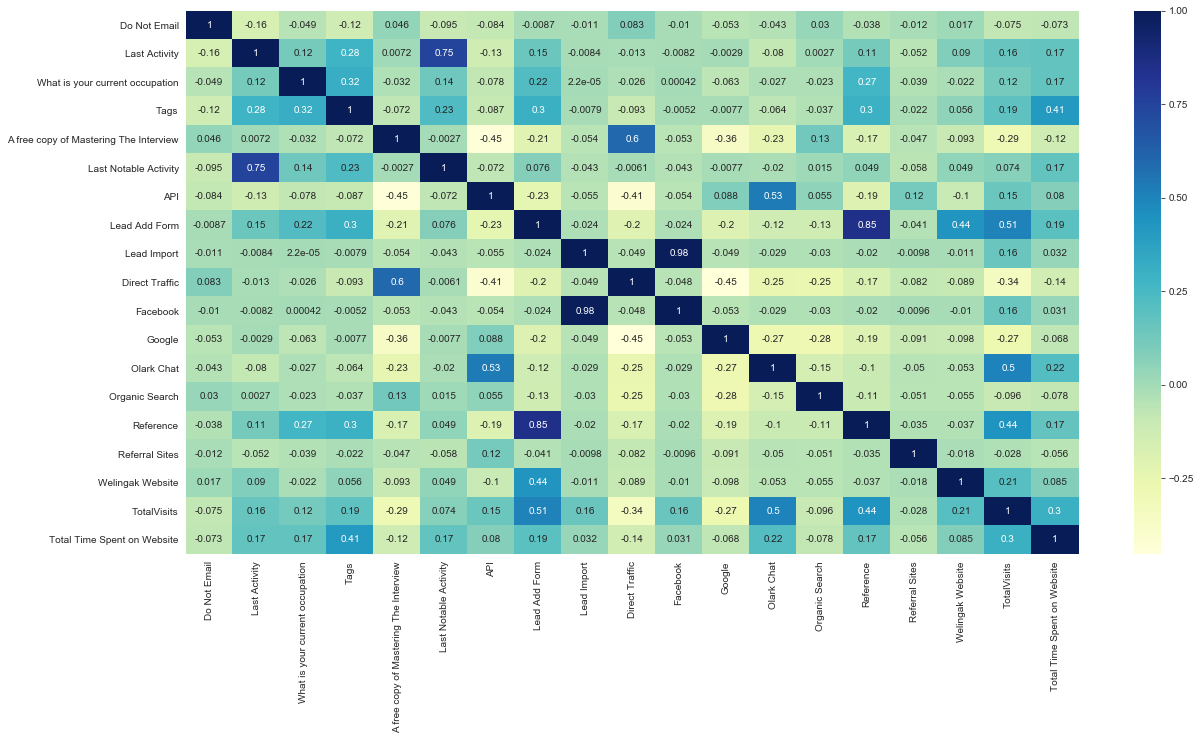

In [980]:
plt.figure(figsize = (20,10))   
sns.heatmap(df_train[col].corr(), cmap="YlGnBu", annot=True)

In [981]:
# Lets Drop Facebook first and see if anythign improves
col.remove('Facebook')

### Model 3

In [982]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5213
Model:                            GLM   Df Residuals:                     5194
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -840.22
Date:                Sun, 10 Mar 2019   Deviance:                       1680.4
Time:                        22:27:37   Pearson chi2:                 8.18e+03
No. Iterations:                     8   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                    -11.1219      1.389     -8.008      0.000     -13.844      -8.400
Do Not Email                              -0.5273      0.320     -1.648      0.099      -1.154       0.100
Last Activity                              1.8041      0.540      3.343      0.001       0.746       2.862
What is your current occupation            2.9907      0.674      4.436      0.000       1.669       4.312
Tags                                       8.4992      0.288     29.492      0.000       7.934       9.064
A free copy of Mastering The Interview    -0.0483      0.196     -0.246      0.805      -0.432       0.336
Last Notable Activity                      4.9791      0.553      9.005      0.000       3.895       6.063
API                                        0.6583      0.189      3.481      0.000       0.288       1.029
Lead Add Form                              2.0798      1.229      1.692      0.091      -0.330       4.489
Lead Import                               -2.0190      1.590     -1.270      0.204      -5.136       1.098
Direct Traffic                            -0.0140      1.260     -0.011      0.991      -2.484       2.456
Google                                    -0.0069      1.256     -0.006      0.996      -2.469       2.455
Olark Chat                                -0.1969      1.289     -0.153      0.879      -2.723       2.330
Organic Search                            -0.1899      1.266     -0.150      0.881      -2.672       2.292
Reference                                 -3.1411      1.765     -1.779      0.075      -6.601       0.319
Referral Sites                            -0.6528      1.357     -0.481      0.631      -3.313       2.007
Welingak Website                           0.9370      1.884      0.497      0.619      -2.756       4.630
TotalVisits                                0.7054      1.050      0.672      0.502      -1.353       2.764
Total Time Spent on Website                4.7068      0.282     16.666      0.000       4.153       5.260
==========================================================================================================
"""

In [983]:
show_vifs(X_train[col])

,Features,VIF
16,TotalVisits,43.24
7,Lead Add Form,20.12
1,Last Activity,17.92
5,Last Notable Activity,17.71
13,Reference,17.27
10,Google,15.77
9,Direct Traffic,14.37
11,Olark Chat,12.94
2,What is your current occupation,10.98
12,Organic Search,7.91


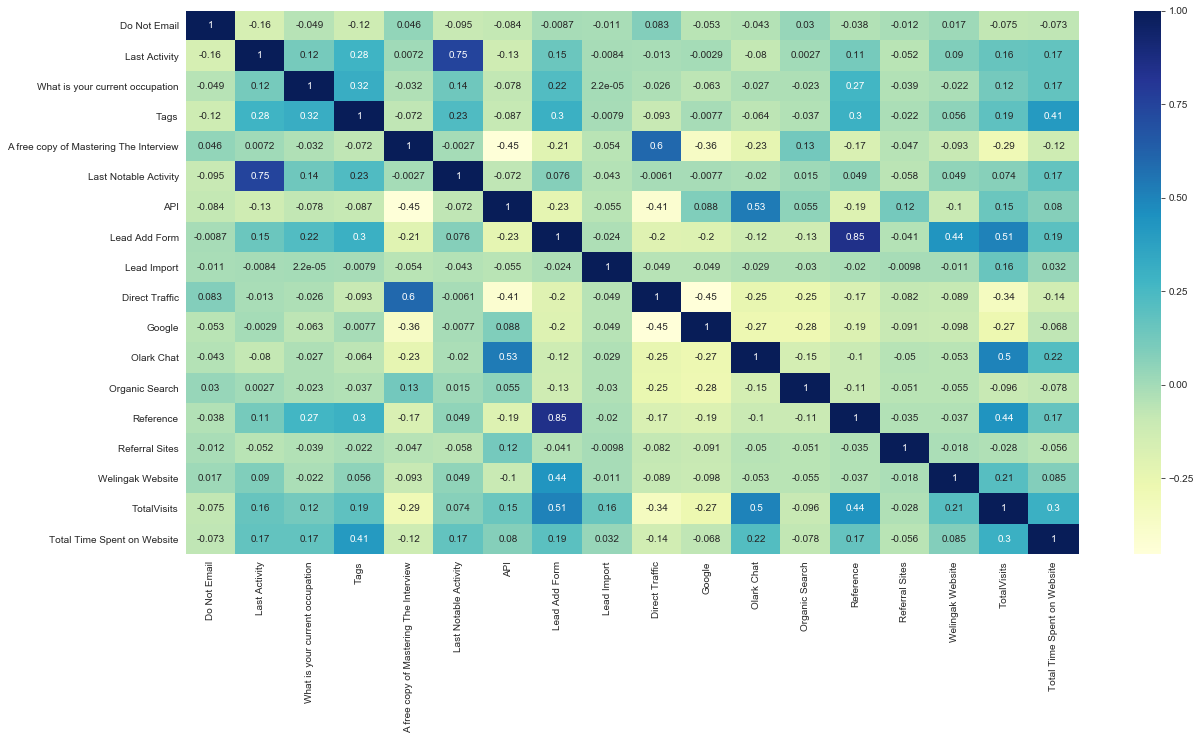

In [984]:
plt.figure(figsize = (20,10))   
sns.heatmap(df_train[col].corr(), cmap="YlGnBu", annot=True)

In [985]:
# Dropping Google
col.remove('Google')

### Model 4

In [986]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5213
Model:                            GLM   Df Residuals:                     5195
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -840.22
Date:                Sun, 10 Mar 2019   Deviance:                       1680.4
Time:                        22:27:38   Pearson chi2:                 8.18e+03
No. Iterations:                     8   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                    -11.1288      0.621    -17.908      0.000     -12.347      -9.911
Do Not Email                              -0.5272      0.320     -1.650      0.099      -1.153       0.099
Last Activity                              1.8040      0.540      3.344      0.001       0.747       2.861
What is your current occupation            2.9906      0.674      4.436      0.000       1.669       4.312
Tags                                       8.4992      0.288     29.492      0.000       7.934       9.064
A free copy of Mastering The Interview    -0.0483      0.196     -0.246      0.805      -0.432       0.336
Last Notable Activity                      4.9792      0.553      9.007      0.000       3.896       6.063
API                                        0.6583      0.189      3.486      0.000       0.288       1.028
Lead Add Form                              2.0798      1.229      1.692      0.091      -0.329       4.489
Lead Import                               -2.0121      0.997     -2.018      0.044      -3.967      -0.058
Direct Traffic                            -0.0072      0.208     -0.035      0.972      -0.415       0.400
Olark Chat                                -0.1900      0.308     -0.617      0.538      -0.794       0.414
Organic Search                            -0.1830      0.218     -0.838      0.402      -0.611       0.245
Reference                                 -3.1342      1.244     -2.519      0.012      -5.573      -0.696
Referral Sites                            -0.6459      0.527     -1.226      0.220      -1.679       0.387
Welingak Website                           0.9439      1.409      0.670      0.503      -1.817       3.705
TotalVisits                                0.7054      1.050      0.672      0.502      -1.353       2.764
Total Time Spent on Website                4.7068      0.282     16.667      0.000       4.153       5.260
==========================================================================================================
"""

In [987]:
show_vifs(X_train[col])

,Features,VIF
7,Lead Add Form,19.39
15,TotalVisits,18.97
1,Last Activity,17.92
5,Last Notable Activity,17.21
12,Reference,14.72
2,What is your current occupation,9.71
16,Total Time Spent on Website,5.41
14,Welingak Website,4.80
3,Tags,3.24
4,A free copy of Mastering The Interview,3.02


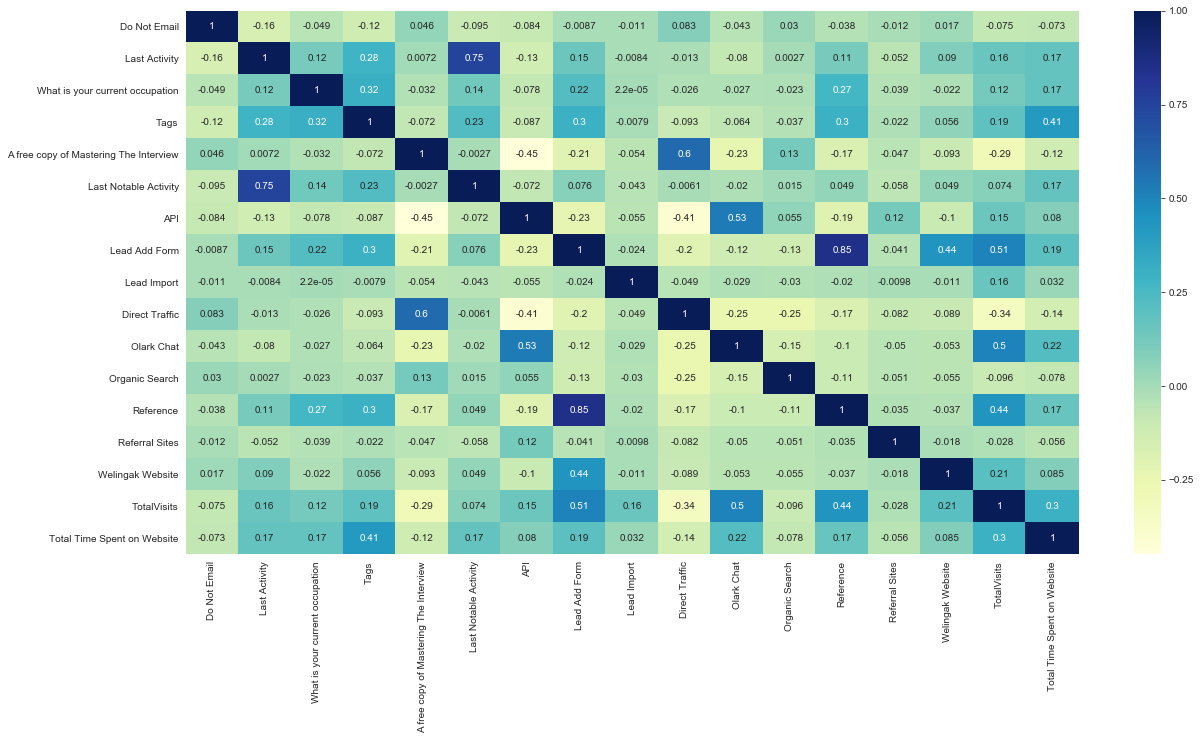

In [988]:
plt.figure(figsize = (20,10))   
sns.heatmap(df_train[col].corr(), cmap="YlGnBu", annot=True)

In [989]:
# Direct Traffic is not correlated but is useless anyway.
col.remove('Direct Traffic')

### Model 5

In [990]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5213
Model:                            GLM   Df Residuals:                     5196
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -840.22
Date:                Sun, 10 Mar 2019   Deviance:                       1680.4
Time:                        22:27:39   Pearson chi2:                 8.18e+03
No. Iterations:                     8   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                    -11.1312      0.617    -18.027      0.000     -12.341      -9.921
Do Not Email                              -0.5278      0.319     -1.655      0.098      -1.153       0.097
Last Activity                              1.8047      0.539      3.347      0.001       0.748       2.861
What is your current occupation            2.9896      0.673      4.440      0.000       1.670       4.309
Tags                                       8.4994      0.288     29.498      0.000       7.935       9.064
A free copy of Mastering The Interview    -0.0516      0.171     -0.301      0.764      -0.388       0.284
Last Notable Activity                      4.9787      0.553      9.009      0.000       3.896       6.062
API                                        0.6591      0.187      3.518      0.000       0.292       1.026
Lead Add Form                              2.0814      1.228      1.695      0.090      -0.326       4.489
Lead Import                               -2.0107      0.996     -2.018      0.044      -3.964      -0.058
Olark Chat                                -0.1891      0.307     -0.616      0.538      -0.791       0.413
Organic Search                            -0.1802      0.203     -0.890      0.374      -0.577       0.217
Reference                                 -3.1340      1.244     -2.519      0.012      -5.572      -0.696
Referral Sites                            -0.6444      0.525     -1.227      0.220      -1.674       0.385
Welingak Website                           0.9440      1.409      0.670      0.503      -1.817       3.705
TotalVisits                                0.7064      1.050      0.673      0.501      -1.351       2.764
Total Time Spent on Website                4.7076      0.282     16.720      0.000       4.156       5.259
==========================================================================================================
"""

In [991]:
show_vifs(X_train[col])

,Features,VIF
7,Lead Add Form,19.29
14,TotalVisits,18.73
1,Last Activity,17.92
5,Last Notable Activity,17.17
11,Reference,14.72
2,What is your current occupation,9.62
15,Total Time Spent on Website,5.41
13,Welingak Website,4.80
3,Tags,3.23
6,API,2.85


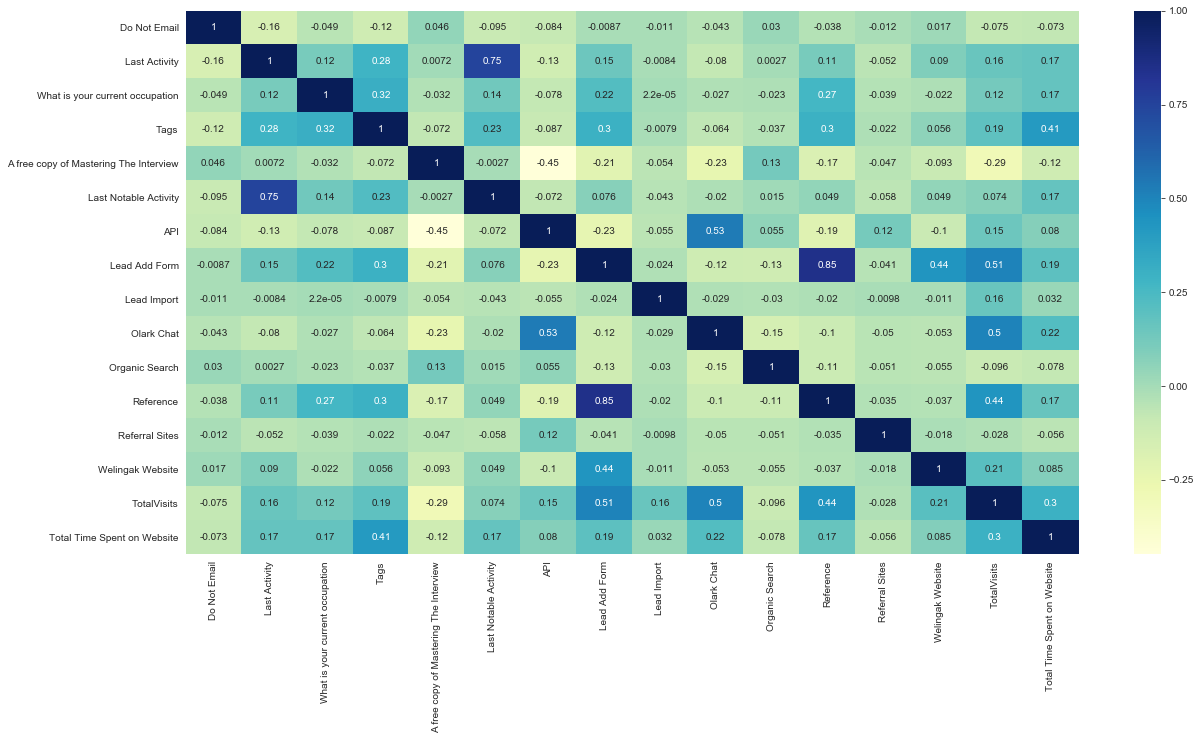

In [992]:
plt.figure(figsize = (20,10))   
sns.heatmap(df_train[col].corr(), cmap="YlGnBu", annot=True)

In [993]:
# A free copy of Mastering The Interview is not useful too.
col.remove('A free copy of Mastering The Interview')

### Model 6

In [994]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5213
Model:                            GLM   Df Residuals:                     5197
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -840.27
Date:                Sun, 10 Mar 2019   Deviance:                       1680.5
Time:                        22:27:40   Pearson chi2:                 8.16e+03
No. Iterations:                     8   Covariance Type:             nonrobust
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -11.1647      0.608    -18.361      0.000     -12.356      -9.973
Do Not Email                       -0.5291      0.319     -1.658      0.097      -1.155       0.096
Last Activity                       1.7975      0.539      3.336      0.001       0.742       2.853
What is your current occupation     2.9838      0.674      4.429      0.000       1.663       4.304
Tags                                8.4985      0.288     29.503      0.000       7.934       9.063
Last Notable Activity               4.9879      0.552      9.037      0.000       3.906       6.070
API                                 0.6864      0.164      4.185      0.000       0.365       1.008
Lead Add Form                       2.1031      1.226      1.715      0.086      -0.300       4.506
Lead Import                        -1.9879      0.994     -2.001      0.045      -3.936      -0.040
Olark Chat                         -0.1954      0.307     -0.637      0.524      -0.796       0.405
Organic Search                     -0.1894      0.200     -0.946      0.344      -0.582       0.203
Reference                          -3.1345      1.244     -2.520      0.012      -5.572      -0.697
Referral Sites                     -0.6467      0.525     -1.231      0.218      -1.676       0.383
Welingak Website                    0.9463      1.409      0.672      0.502      -1.815       3.707
TotalVisits                         0.7276      1.049      0.694      0.488      -1.328       2.783
Total Time Spent on Website         4.7065      0.282     16.719      0.000       4.155       5.258
===================================================================================================
"""

In [995]:
show_vifs(X_train[col])

,Features,VIF
6,Lead Add Form,19.01
13,TotalVisits,17.96
1,Last Activity,17.91
4,Last Notable Activity,17.16
10,Reference,14.72
2,What is your current occupation,9.48
14,Total Time Spent on Website,5.40
12,Welingak Website,4.80
3,Tags,3.23
5,API,2.30


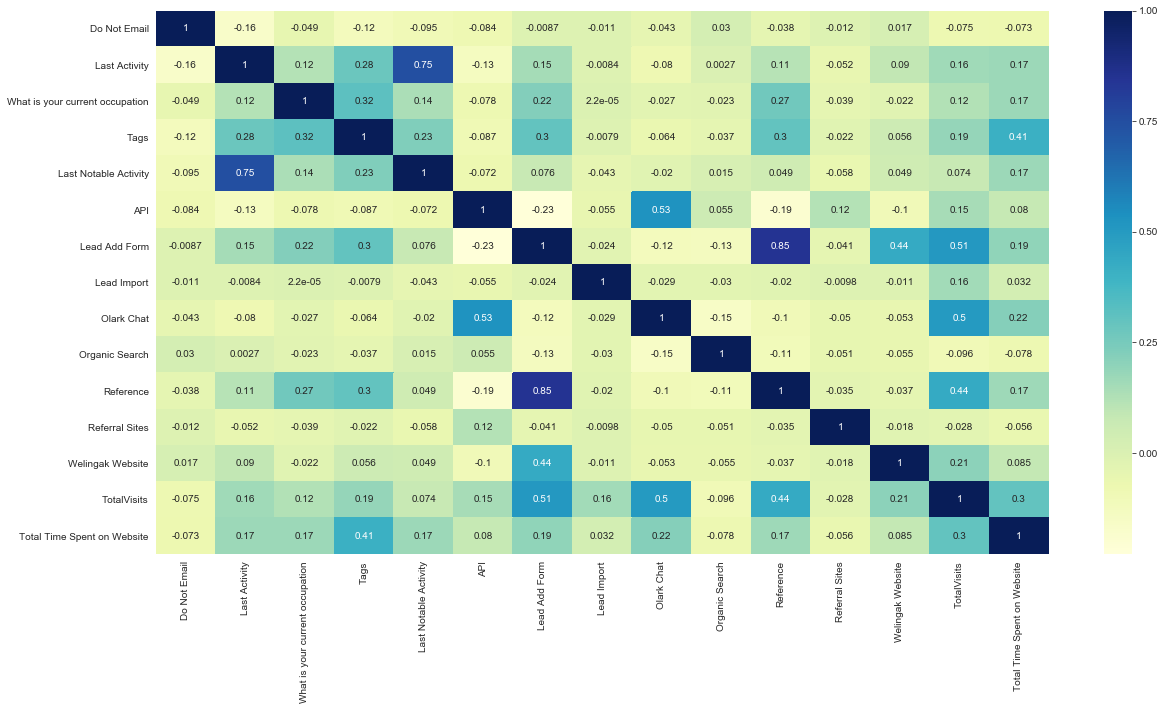

In [996]:
plt.figure(figsize = (20,10))   
sns.heatmap(df_train[col].corr(), cmap="YlGnBu", annot=True)

In [997]:
# It is a redundant feature
col.remove('Lead Add Form')

### Model 7

In [998]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5213
Model:                            GLM   Df Residuals:                     5198
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -842.01
Date:                Sun, 10 Mar 2019   Deviance:                       1684.0
Time:                        22:27:41   Pearson chi2:                 8.29e+03
No. Iterations:                     8   Covariance Type:             nonrobust
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -11.3698      0.601    -18.916      0.000     -12.548     -10.192
Do Not Email                       -0.5032      0.314     -1.603      0.109      -1.118       0.112
Last Activity                       1.7844      0.538      3.315      0.001       0.729       2.839
What is your current occupation     3.0263      0.673      4.496      0.000       1.707       4.346
Tags                                8.4943      0.287     29.560      0.000       7.931       9.058
Last Notable Activity               4.9947      0.551      9.062      0.000       3.914       6.075
API                                 0.6799      0.164      4.148      0.000       0.359       1.001
Lead Import                        -2.1369      0.998     -2.141      0.032      -4.093      -0.180
Olark Chat                         -0.3074      0.301     -1.023      0.306      -0.897       0.282
Organic Search                     -0.2099      0.200     -1.050      0.294      -0.602       0.182
Reference                          -1.1750      0.455     -2.580      0.010      -2.068      -0.282
Referral Sites                     -0.6583      0.525     -1.254      0.210      -1.687       0.370
Welingak Website                    2.9342      0.789      3.720      0.000       1.388       4.480
TotalVisits                         1.2300      1.015      1.212      0.225      -0.759       3.219
Total Time Spent on Website         4.7107      0.281     16.738      0.000       4.159       5.262
===================================================================================================
"""

In [999]:
show_vifs(X_train[col])

,Features,VIF
1,Last Activity,17.89
12,TotalVisits,17.67
4,Last Notable Activity,17.16
2,What is your current occupation,9.40
13,Total Time Spent on Website,5.40
3,Tags,3.21
5,API,2.29
7,Olark Chat,2.22
9,Reference,1.47
8,Organic Search,1.26


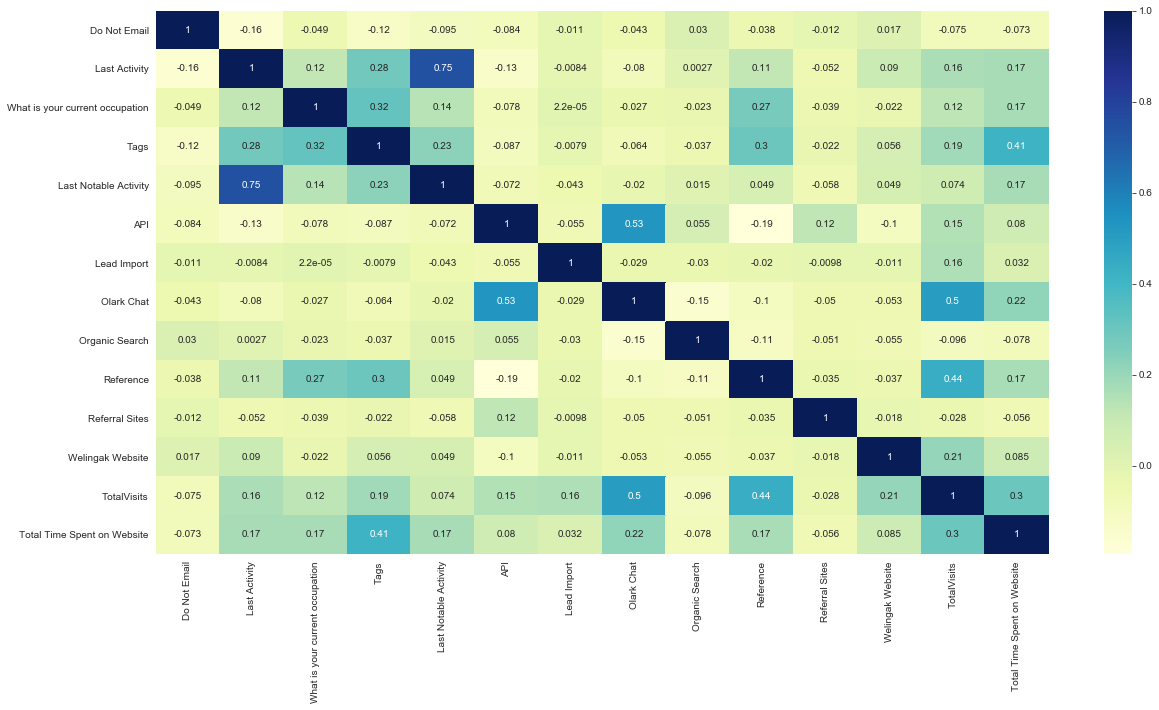

In [1000]:
plt.figure(figsize = (20,10))   
sns.heatmap(df_train[col].corr(), cmap="YlGnBu", annot=True)

In [1001]:
# Dropping Last Activity as it is redundant
col.remove('Last Activity')

### Model 8

In [1002]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5213
Model:                            GLM   Df Residuals:                     5199
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -847.52
Date:                Sun, 10 Mar 2019   Deviance:                       1695.0
Time:                        22:27:42   Pearson chi2:                 7.65e+03
No. Iterations:                     8   Covariance Type:             nonrobust
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -11.1875      0.591    -18.941      0.000     -12.345     -10.030
Do Not Email                       -0.5480      0.310     -1.770      0.077      -1.155       0.059
What is your current occupation     2.8325      0.668      4.241      0.000       1.524       4.141
Tags                                8.5110      0.286     29.725      0.000       7.950       9.072
Last Notable Activity               6.2830      0.404     15.535      0.000       5.490       7.076
API                                 0.6520      0.163      4.001      0.000       0.333       0.971
Lead Import                        -2.1809      1.000     -2.180      0.029      -4.141      -0.220
Olark Chat                         -0.4255      0.295     -1.440      0.150      -1.005       0.153
Organic Search                     -0.2375      0.199     -1.191      0.234      -0.629       0.153
Reference                          -1.1504      0.451     -2.548      0.011      -2.035      -0.266
Referral Sites                     -0.7252      0.524     -1.384      0.166      -1.753       0.302
Welingak Website                    2.9735      0.790      3.764      0.000       1.425       4.522
TotalVisits                         1.6070      0.993      1.618      0.106      -0.340       3.554
Total Time Spent on Website         4.7216      0.281     16.806      0.000       4.171       5.272
===================================================================================================
"""

In [1003]:
show_vifs(X_train[col])

,Features,VIF
11,TotalVisits,16.03
1,What is your current occupation,9.38
3,Last Notable Activity,7.63
12,Total Time Spent on Website,5.40
2,Tags,3.17
4,API,2.29
6,Olark Chat,2.15
8,Reference,1.46
7,Organic Search,1.26
10,Welingak Website,1.12


In [1004]:
# High Multicollinearity for TotaVisits
col.remove('TotalVisits')

### Model 9

In [1005]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5213
Model:                            GLM   Df Residuals:                     5200
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -848.83
Date:                Sun, 10 Mar 2019   Deviance:                       1697.7
Time:                        22:27:42   Pearson chi2:                 7.29e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -10.5390      0.423    -24.914      0.000     -11.368      -9.710
Do Not Email                       -0.5522      0.307     -1.798      0.072      -1.154       0.050
What is your current occupation     2.8215      0.670      4.213      0.000       1.509       4.134
Tags                                8.5144      0.286     29.753      0.000       7.953       9.075
Last Notable Activity               6.3026      0.404     15.617      0.000       5.512       7.094
API                                 0.6281      0.162      3.874      0.000       0.310       0.946
Lead Import                        -1.7624      0.943     -1.869      0.062      -3.611       0.086
Olark Chat                         -0.0835      0.206     -0.405      0.685      -0.487       0.320
Organic Search                     -0.2047      0.198     -1.033      0.302      -0.593       0.184
Reference                          -0.7404      0.377     -1.964      0.050      -1.479      -0.002
Referral Sites                     -0.6946      0.526     -1.320      0.187      -1.726       0.337
Welingak Website                    3.2878      0.761      4.320      0.000       1.796       4.779
Total Time Spent on Website         4.7382      0.280     16.913      0.000       4.189       5.287
===================================================================================================
"""

In [1006]:
show_vifs(X_train[col])

,Features,VIF
1,What is your current occupation,6.84
3,Last Notable Activity,6.02
11,Total Time Spent on Website,5.09
2,Tags,3.16
4,API,2.25
6,Olark Chat,1.81
8,Reference,1.28
7,Organic Search,1.24
0,Do Not Email,1.08
9,Referral Sites,1.06


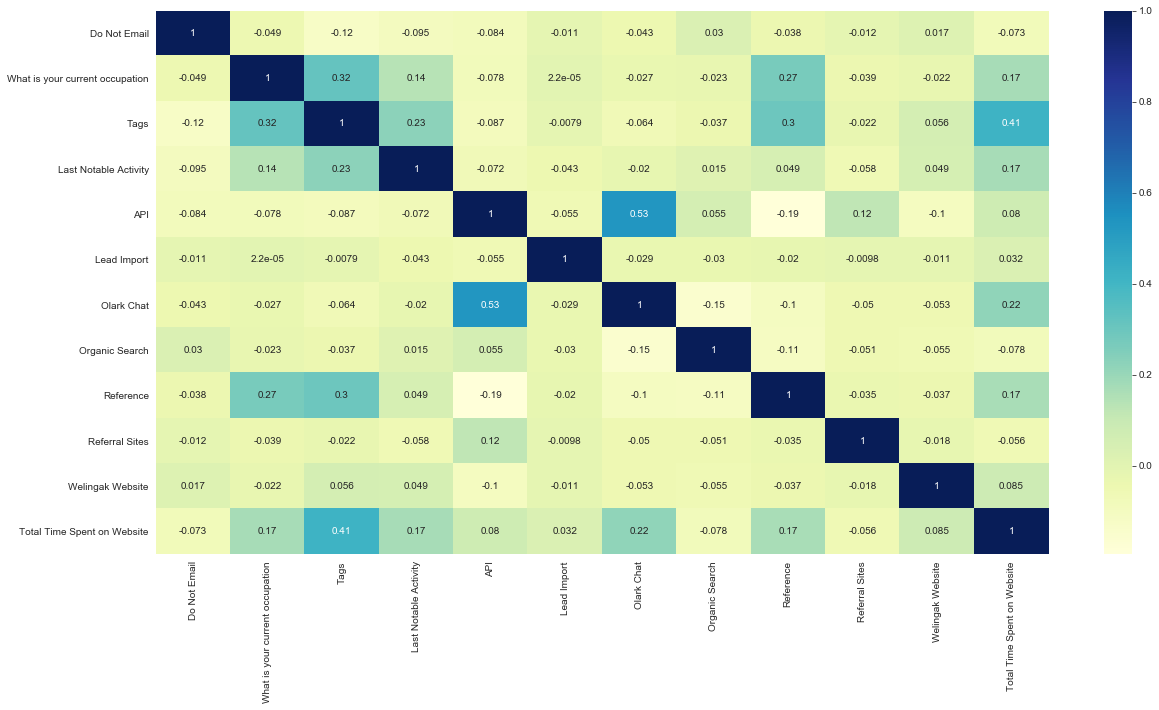

In [1007]:
plt.figure(figsize = (20,10))   
sns.heatmap(df_train[col].corr(), cmap="YlGnBu", annot=True)

In [1008]:
# Lets drop Olark Chat here
col.remove('Olark Chat')

### Model 10

In [1009]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5213
Model:                            GLM   Df Residuals:                     5201
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -848.91
Date:                Sun, 10 Mar 2019   Deviance:                       1697.8
Time:                        22:27:43   Pearson chi2:                 7.28e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                             -10.5196      0.420    -25.065      0.000     -11.342      -9.697
Do Not Email                       -0.5503      0.307     -1.794      0.073      -1.152       0.051
What is your current occupation     2.7883      0.664      4.197      0.000       1.486       4.090
Tags                                8.5171      0.286     29.781      0.000       7.957       9.078
Last Notable Activity               6.2993      0.403     15.617      0.000       5.509       7.090
API                                 0.5920      0.136      4.367      0.000       0.326       0.858
Lead Import                        -1.7559      0.942     -1.863      0.062      -3.603       0.091
Organic Search                     -0.1828      0.191     -0.959      0.337      -0.556       0.191
Reference                          -0.7342      0.377     -1.949      0.051      -1.472       0.004
Referral Sites                     -0.6622      0.520     -1.273      0.203      -1.681       0.357
Welingak Website                    3.2928      0.761      4.329      0.000       1.802       4.784
Total Time Spent on Website         4.7185      0.276     17.104      0.000       4.178       5.259
===================================================================================================
"""

In [1010]:
show_vifs(X_train[col])

,Features,VIF
1,What is your current occupation,6.84
3,Last Notable Activity,6.02
10,Total Time Spent on Website,4.85
2,Tags,3.13
4,API,1.62
7,Reference,1.28
6,Organic Search,1.18
0,Do Not Email,1.08
9,Welingak Website,1.05
8,Referral Sites,1.04


In [1011]:
col.remove('What is your current occupation')

### Model 11

In [1012]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5213
Model:                            GLM   Df Residuals:                     5202
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -858.60
Date:                Sun, 10 Mar 2019   Deviance:                       1717.2
Time:                        22:27:43   Pearson chi2:                 7.84e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -9.5856      0.339    -28.247      0.000     -10.251      -8.921
Do Not Email                   -0.5895      0.306     -1.926      0.054      -1.189       0.011
Tags                            8.6510      0.285     30.313      0.000       8.092       9.210
Last Notable Activity           6.4755      0.408     15.867      0.000       5.676       7.275
API                             0.6239      0.135      4.617      0.000       0.359       0.889
Lead Import                    -1.6607      0.901     -1.842      0.065      -3.428       0.106
Organic Search                 -0.1999      0.188     -1.062      0.288      -0.569       0.169
Reference                      -0.3916      0.359     -1.091      0.275      -1.095       0.312
Referral Sites                 -0.7894      0.510     -1.547      0.122      -1.790       0.211
Welingak Website                3.4215      0.761      4.495      0.000       1.930       4.913
Total Time Spent on Website     4.7334      0.271     17.455      0.000       4.202       5.265
===============================================================================================
"""

In [1013]:
show_vifs(X_train[col])

,Features,VIF
9,Total Time Spent on Website,4.55
2,Last Notable Activity,3.96
1,Tags,3.01
3,API,1.59
6,Reference,1.24
5,Organic Search,1.17
0,Do Not Email,1.06
8,Welingak Website,1.05
7,Referral Sites,1.04
4,Lead Import,1.01


In [1014]:
from sklearn import metrics

In [1015]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.182345
1    0.952694
2    0.015961
3    0.024629
4    0.093209
5    0.001668
6    0.962784
7    0.067038
8    0.991726
9    0.001160
dtype: float64

In [1016]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18234498, 0.95269355, 0.01596058, 0.02462877, 0.09320909,
       0.00166784, 0.9627841 , 0.06703845, 0.9917262 , 0.00115985])

In [1017]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conv_Prob
0,0,0.182345
1,1,0.952694
2,0,0.015961
3,0,0.024629
4,0,0.093209


In [1018]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conv_Prob,predicted
0,0,0.182345,0
1,1,0.952694,1
2,0,0.015961,0
3,0,0.024629,0
4,0,0.093209,0


In [1019]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2704  148]
 [ 152 2209]]


Looks like our hard work paid off. This is very very good result.

In [1020]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9424515633991943


In [1021]:
# ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

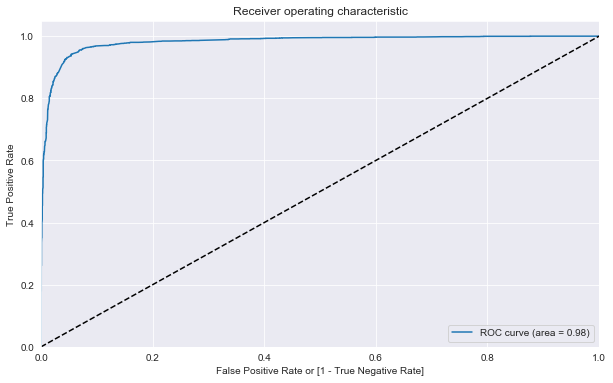

In [1022]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

### Model 12

In [1023]:
# 11th model had Organic Search with high P-value
col.remove('Organic Search')

In [1024]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5213
Model:                            GLM   Df Residuals:                     5203
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -859.16
Date:                Sun, 10 Mar 2019   Deviance:                       1718.3
Time:                        22:27:44   Pearson chi2:                 7.93e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -9.6018      0.339    -28.322      0.000     -10.266      -8.937
Do Not Email                   -0.5943      0.306     -1.943      0.052      -1.194       0.005
Tags                            8.6386      0.285     30.336      0.000       8.080       9.197
Last Notable Activity           6.4609      0.408     15.841      0.000       5.661       7.260
API                             0.6162      0.135      4.569      0.000       0.352       0.881
Lead Import                    -1.6348      0.900     -1.816      0.069      -3.399       0.129
Reference                      -0.3629      0.358     -1.015      0.310      -1.064       0.338
Referral Sites                 -0.7569      0.509     -1.486      0.137      -1.755       0.241
Welingak Website                3.4463      0.761      4.530      0.000       1.955       4.937
Total Time Spent on Website     4.7405      0.271     17.494      0.000       4.209       5.272
===============================================================================================
"""

In [1025]:
show_vifs(X_train[col])

,Features,VIF
8,Total Time Spent on Website,4.54
2,Last Notable Activity,3.83
1,Tags,3.01
3,API,1.58
5,Reference,1.23
0,Do Not Email,1.06
7,Welingak Website,1.05
6,Referral Sites,1.03
4,Lead Import,1.01


0.942643391521197


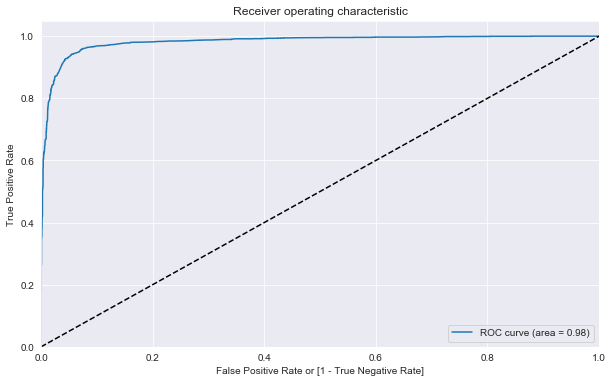

In [1026]:
# Calculating prediction and Accuracy and Plotting ROC Curve
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

### Model 13

In [1027]:
col.remove('Reference')

In [1028]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5213
Model:                            GLM   Df Residuals:                     5204
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -859.66
Date:                Sun, 10 Mar 2019   Deviance:                       1719.3
Time:                        22:27:44   Pearson chi2:                 7.84e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -9.5775      0.337    -28.389      0.000     -10.239      -8.916
Do Not Email                   -0.5953      0.306     -1.945      0.052      -1.195       0.005
Tags                            8.5789      0.276     31.027      0.000       8.037       9.121
Last Notable Activity           6.4508      0.407     15.864      0.000       5.654       7.248
API                             0.6341      0.133      4.755      0.000       0.373       0.896
Lead Import                    -1.5959      0.893     -1.787      0.074      -3.347       0.155
Referral Sites                 -0.7519      0.507     -1.482      0.138      -1.746       0.242
Welingak Website                3.4675      0.760      4.562      0.000       1.978       4.957
Total Time Spent on Website     4.7135      0.269     17.495      0.000       4.185       5.242
===============================================================================================
"""

I think we can do with this model.

0.942643391521197


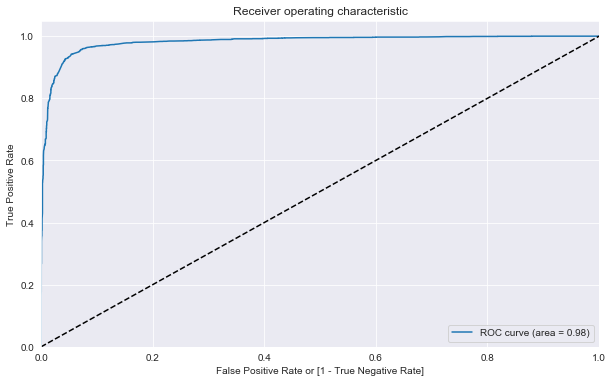

In [1029]:
# Calculating prediction and Accuracy and Plotting ROC Curve
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

### Model 14

In [1030]:
col.remove('Referral Sites')

In [1031]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5213
Model:                            GLM   Df Residuals:                     5205
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -860.85
Date:                Sun, 10 Mar 2019   Deviance:                       1721.7
Time:                        22:27:45   Pearson chi2:                 7.87e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -9.6063      0.337    -28.470      0.000     -10.268      -8.945
Do Not Email                   -0.6034      0.306     -1.973      0.048      -1.203      -0.004
Tags                            8.5770      0.277     31.010      0.000       8.035       9.119
Last Notable Activity           6.4780      0.407     15.933      0.000       5.681       7.275
API                             0.6074      0.132      4.597      0.000       0.348       0.866
Lead Import                    -1.5968      0.893     -1.788      0.074      -3.347       0.154
Welingak Website                3.4705      0.761      4.563      0.000       1.980       4.961
Total Time Spent on Website     4.7460      0.269     17.664      0.000       4.219       5.273
===============================================================================================
"""

0.9422597352771916


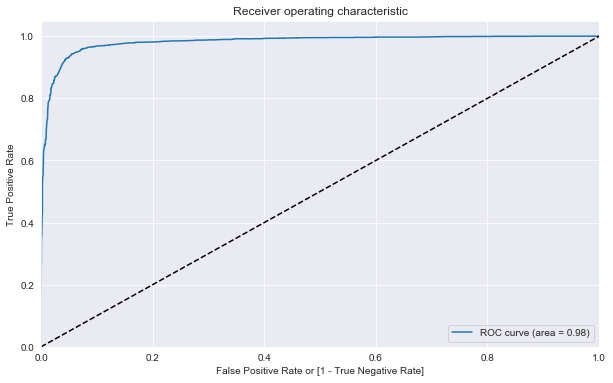

In [1032]:
# Calculating prediction and Accuracy and Plotting ROC Curve
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

### Model 15

In [1033]:
col.remove('Lead Import')

In [1034]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5213
Model:                            GLM   Df Residuals:                     5206
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -862.50
Date:                Sun, 10 Mar 2019   Deviance:                       1725.0
Time:                        22:27:45   Pearson chi2:                 7.86e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -9.6146      0.337    -28.502      0.000     -10.276      -8.953
Do Not Email                   -0.5905      0.306     -1.932      0.053      -1.189       0.008
Tags                            8.5668      0.276     31.018      0.000       8.025       9.108
Last Notable Activity           6.4967      0.406     15.994      0.000       5.701       7.293
API                             0.6248      0.132      4.744      0.000       0.367       0.883
Welingak Website                3.4875      0.760      4.587      0.000       1.997       4.978
Total Time Spent on Website     4.7198      0.268     17.613      0.000       4.195       5.245
===============================================================================================
"""

0.9422597352771916


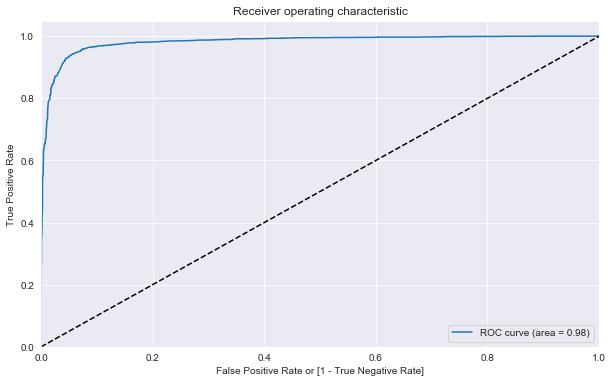

In [1035]:
# Calculating prediction and Accuracy and Plotting ROC Curve
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

Since we have a very good model. Lets remove the unstable Do Not Email feature here. See how does it affects the model.

### Model 16

In [1036]:
col.remove('Do Not Email')

In [1037]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5213
Model:                            GLM   Df Residuals:                     5207
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -864.46
Date:                Sun, 10 Mar 2019   Deviance:                       1728.9
Time:                        22:27:45   Pearson chi2:                 7.68e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -9.6839      0.336    -28.797      0.000     -10.343      -9.025
Tags                            8.6023      0.276     31.129      0.000       8.061       9.144
Last Notable Activity           6.5375      0.405     16.148      0.000       5.744       7.331
API                             0.6493      0.131      4.949      0.000       0.392       0.906
Welingak Website                3.4481      0.761      4.530      0.000       1.956       4.940
Total Time Spent on Website     4.7097      0.267     17.613      0.000       4.186       5.234
===============================================================================================
"""

0.9422597352771916


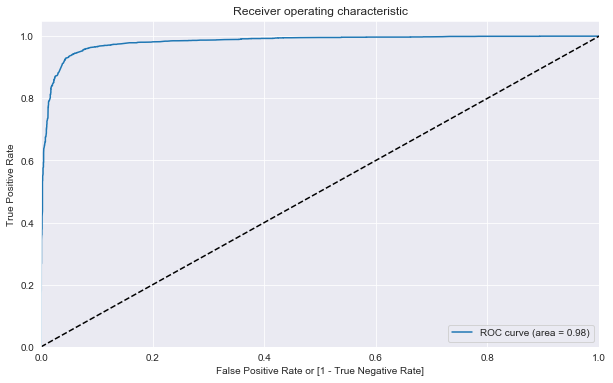

In [1038]:
# Calculating prediction and Accuracy and Plotting ROC Curve
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

Well, No affects on the accuracy of our model.

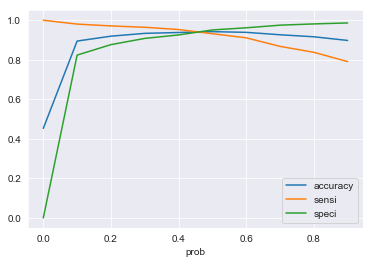

In [1039]:
# Calculating Accuracy, Sensitivity and specificity for different cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

The intersection seems to be close to 0.45.

In [1040]:
# using 0.45 as cutoff
y_train_pred_final['final_predicted'] = y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.3 else 0)

In [1041]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9336274697870708

In [1042]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2590,  262],
       [  84, 2277]], dtype=int64)

In [1043]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1044]:
# sensitivity
TP / float(TP+FN)

0.9644218551461246

In [1045]:
# specificity
TN / float(TN+FP)

0.9081346423562412

In [1046]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.09186535764375876


In [1047]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8968097676250493


In [1048]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9685863874345549


### Lets Make Predictions on Test Set

In [1049]:
X_test = X_test[col]

In [1050]:
X_test_sm = sm.add_constant(X_test)

0.9213701829505644


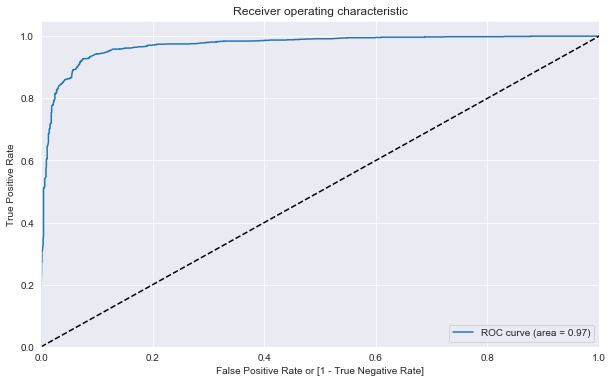

In [1051]:
y_test_pred = res.predict(X_test_sm)
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Conv_Prob':y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.45 else 0)
print(metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.predicted))
draw_roc(y_test_pred_final.Converted, y_test_pred_final.Conv_Prob)

In [1052]:
y_test_pred_final.head()

,Converted,Conv_Prob,predicted
0,0,0.001514,0
1,0,0.119626,0
2,0,0.002971,0
3,1,0.990453,1
4,0,0.036874,0


In [1053]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.predicted )
confusion2

array([[1253,  116],
       [  86, 1114]], dtype=int64)

In [1054]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1055]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9283333333333333

In [1056]:
# Let us calculate specificity
TN / float(TN+FP)

0.9152666179693206